# <center>Trabajo final de máster: Optimización del almacenamiento y análisis predictivo en sistemas IoT para la gestión de flotas logísticas<center>

**Nombre y apellidos: Daniel Puente Douriet**

**Usuario VIU: dpuented**

# **Descripción del conjunto de datos de vehículos**
Este conjunto de datos consta de 92,000 registros relacionados con predicciones de mantenimiento de vehículos dentro de operaciones logísticas en California, centrándose específicamente en aplicaciones de Internet de las Cosas (IoT). Proporciona información detallada sobre diversos vehículos, sus condiciones de operación, historial de mantenimiento y métricas de rendimiento, lo que lo convierte en un recurso valioso para el análisis de mantenimiento predictivo.

## **Descripción de las características:**

- **`Vehicle_ID`**: Identificador único para cada vehículo.  
- **`Make_and_Model`**: Fabricante y modelo del vehículo.  
- **`Year_of_Manufacture`**: Año en que el vehículo fue fabricado.  
- **`Vehicle_Type`**: Tipo de vehículo (por ejemplo, Camión, Furgoneta).  
- **`Usage_Hours`**: Horas totales en las que el vehículo ha estado en operación.  
- **`Route_Info`**: Descripción del tipo de rutas que el vehículo suele tomar (por ejemplo, Rural, Urbano).  
- **`Load_Capacity`**: Carga máxima que el vehículo puede transportar.  
- **`Actual_Load`**: Carga real transportada durante las operaciones.  
- **`Last_Maintenance_Date`**: Fecha de la última actividad de mantenimiento del vehículo.  
- **`Maintenance_Type`**: Tipo de mantenimiento realizado (por ejemplo, Cambio de aceite, Rotación de llantas).  
- **`Maintenance_Cost`**: Costo asociado con el último mantenimiento realizado.  
- **`Engine_Temperature`**: Temperatura del motor durante la operación.  
- **`Tire_Pressure`**: Presión de los neumáticos en PSI.  
- **`Fuel_Consumption`**: Consumo de combustible en galones.  
- **`Battery_Status`**: Estado actual de la batería del vehículo.  
- **`Vibration_Levels`**: Niveles de vibración medidos del vehículo.  
- **`Oil_Quality`**: Calidad del aceite del motor, clasificado como **Bueno**, **Regular** o **Malo**.  
- **`Brake_Condition`**: Condición de los frenos del vehículo.  
- **`Failure_History`**: Indica si el vehículo tiene historial de fallas (**1 = Sí**, **0 = No**).  
- **`Anomalies_Detected`**: Número de anomalías detectadas durante el monitoreo.  
- **`Maintenance_Required`**: Indica si se requiere mantenimiento (**1 = Sí**, **0 = No**), esta es la que consideramos como variable objetivo.  
- **`Weather_Conditions`**: Condiciones climáticas durante la operación del vehículo (por ejemplo, **Despejado**, **Lluvioso**).  
- **`Road_Conditions`**: Tipo de condiciones de la carretera experimentadas (por ejemplo, **Autopista**, **Urbano**).  
- **`Delivery_Times`**: Tiempos promedio de entrega del vehículo.  
- **`Downtime_Maintenance`**: Tiempo de inactividad debido a actividades de mantenimiento.  
- **`Impact_on_Efficiency`**: Métrica que indica cómo las actividades de mantenimiento afectan la eficiencia operativa.  



# Resumen del ejercicio

Este Trabajo Fin de Máster abordó el análisis y aprovechamiento de datos generados por dispositivos IoT en el contexto logístico, con el objetivo de explorar cómo estas tecnologías, combinadas con herramientas de Big Data y aprendizaje automático, pueden contribuir a mejorar la eficiencia operativa en la entrega de productos.

A partir del análisis de dos conjuntos de datos distintos, se decidió plantear dos acercamientos independientes. Cada uno de estos enfoques permitió abordar una problemática específica del entorno del transporte y distribución.

El primer acercamiento se enfocó en desarrollar un sistema de predicción de
necesidades de mantenimiento para vehículos de reparto. Se utilizaron datos históricos de fallos, reparaciones y mantenimientos, combinados con información recogida en tiempo real por sensores IoT. El objetivo fue anticipar posibles averías y optimizar los planes de mantenimiento, contribuyendo así a la reducción de tiempos de inactividad y costes operativos.

El segundo acercamiento se centró en la predicción de retrasos en la entrega de productos. Para ello, se analizaron variables relacionadas con la ubicación de los vehículos, características de las rutas, consumo de combustible y niveles de tráfico. A través de modelos predictivos, se buscó anticipar situaciones que pudieran comprometer los tiempos de entrega, permitiendo una mejor planificación logística y una mayor satisfacción del cliente.

Ambos desarrollos se complementaron con la creación de dashboards interactivos en Power BI, que permiten visualizar de forma clara y en tiempo real los principales indicadores de cada uno de los casos de estudio, facilitando la toma de decisiones basada en datos.

# Inicialización

Importar las librerias necesarias y carga de los archivos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_regression, SelectFromModel, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Declaramos el valor de la semilla en 42

In [2]:
seed = 42
np.random.seed(seed)
random.seed(seed)

# Carga y exploración inicial de datos

En esta sección se importan los datasets desde Google Drive utilizando la biblioteca pandas. Se trabaja con dos archivos CSV que contienen información clave para el análisis. El primer dataset corresponde a datos de GPS y sensores, con un total de 32,065 registros y 26 columnas, mientras que el segundo dataset almacena información de vehículos extraída de igual manera con dispositivos IoT, con 92,000 registros y 27 columnas.

Después de la carga de los datos, se revisa su estructura utilizando la función `.shape`, lo que permite confirmar que los archivos se han importado correctamente y cuentan con la cantidad esperada de registros y variables. Esta verificación es un paso fundamental antes de proceder con la limpieza y transformación de los datos.

In [3]:
# Definir las rutas locales de los CSV
vehiculos_path = r'C:\Users\danyo\OneDrive\Escritorio\Master Big Data\14MBID TFM\Datasets\dataset_vehiculos.csv'
gps_path = r'C:\Users\danyo\OneDrive\Escritorio\Master Big Data\14MBID TFM\Datasets\dataset_gps.csv'

# Cargar los CSV
df_gps = pd.read_csv(gps_path)
df_gps_reg = pd.read_csv(gps_path)
df_vehiculos = pd.read_csv(vehiculos_path)

# Revisar las dimensiones y mostrar un preview
print("Shape dataset GPS:", df_gps.shape)
print("Shape dataset Vehículos:", df_vehiculos.shape)

df_gps.head(), df_vehiculos.head()

Shape dataset GPS: (32065, 26)
Shape dataset Vehículos: (92000, 26)


(          timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
 0  01/01/2021 00:00             40.375568             -77.014318   
 1  01/01/2021 01:00             33.507818            -117.036902   
 2  01/01/2021 02:00             30.020640             -75.269224   
 3  01/01/2021 03:00             36.649223             -70.190529   
 4  01/01/2021 04:00             30.001279             -70.012195   
 
    fuel_consumption_rate  eta_variation_hours  traffic_congestion_level  \
 0               5.136512             4.998009                  5.927586   
 1               5.101512             0.984929                  1.591992   
 2               5.090803             4.972665                  8.787765   
 3               8.219558             3.095064                  0.045257   
 4               5.000075             3.216077                  8.004851   
 
    warehouse_inventory_level  loading_unloading_time  \
 0                 985.716862                4.951392   
 1          

# Exploración inicial del Dataset de Vehículos

En esta sección se exploraron los tipos de datos de las variables en los datasets, identificando su tipo (numérico o categórico) y verificando posibles inconsistencias. Se llevó a cabo un análisis exploratorio inicial, incluyendo la revisión de la distribución de las variables, la detección de valores atípicos y el manejo de datos faltantes.

**Exploración inicial de datos**

In [4]:
# Exploración de los tipos de datos que tenemos en el dataset.
print(df_vehiculos.dtypes)

Vehicle_ID                 int64
Make_and_Model            object
Year_of_Manufacture        int64
Vehicle_Type              object
Usage_Hours                int64
Route_Info                object
Load_Capacity            float64
Actual_Load              float64
Last_Maintenance_Date     object
Maintenance_Type          object
Maintenance_Cost         float64
Engine_Temperature         int64
Tire_Pressure            float64
Fuel_Consumption         float64
Battery_Status           float64
Vibration_Levels         float64
Oil_Quality              float64
Brake_Condition           object
Failure_History            int64
Anomalies_Detected         int64
Maintenance_Required       int64
Weather_Conditions        object
Road_Conditions           object
Delivery_Times           float64
Downtime_Maintenance     float64
Impact_on_Efficiency     float64
dtype: object


**Resumen estadístico y posibles outliers**

Para obtener una visión inicial de los patrones en el dataset, utilizaremos la función describe(), que proporciona estadísticas clave como la media, la desviación estándar, y los percentiles de las variables numéricas. Esta exploración nos ayuda a identificar tendencias, rangos, y posibles valores atípicos, lo que nos guiará en la selección de técnicas de preprocesamiento y modelado.



In [5]:
# Exploración general del dataset extraído
df_vehiculos.describe()

,Vehicle_ID,Year_of_Manufacture,Usage_Hours,Load_Capacity,Actual_Load,Maintenance_Cost,Engine_Temperature,Tire_Pressure,Fuel_Consumption,Battery_Status,Vibration_Levels,Oil_Quality,Failure_History,Anomalies_Detected,Maintenance_Required,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
count,92000.00000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.0,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000,92000.000000
mean,46000.50000,2016.968478,2989.550913,25.068001,23.771355,1043.004745,120.0,32.570643,10.657493,45.669862,3.977629,79.930316,0.399565,0.452196,0.767989,99.283161,3.210282,0.208325
std,26558.25672,5.359597,2992.083426,25.040153,24.194555,1575.109426,0.0,14.483096,5.979493,1.634766,4.003637,9.794350,0.489812,0.497712,0.422118,79.708201,6.429751,0.111234
min,1.00000,2005.000000,0.000000,0.000013,0.000010,100.002837,120.0,20.000000,5.000000,45.000000,0.000370,38.303330,0.000000,0.000000,0.000000,30.000000,0.000000,0.100000
25%,23000.75000,2013.000000,856.000000,7.233425,6.725843,225.213756,120.0,20.000000,5.000000,45.000000,1.135643,73.319542,0.000000,0.000000,1.000000,30.000000,0.000000,0.106637
50%,46000.50000,2020.000000,2070.000000,17.401696,16.245317,348.722087,120.0,24.516540,8.349716,45.000000,2.760726,80.013201,0.000000,0.000000,1.000000,69.617815,0.000000,0.179359
75%,69000.25000,2021.000000,4146.000000,34.746243,32.681695,474.925612,120.0,48.810813,16.678173,45.000000,5.498541,86.750897,1.000000,1.000000,1.000000,139.084008,3.775145,0.271323
max,92000.00000,2022.000000,36392.000000,332.341562,264.033718,5999.905095,120.0,55.000000,20.000000,50.000000,45.475464,100.000000,1.000000,1.000000,1.000000,300.000000,88.624732,0.822859


Al revisar los estadísticos descriptivos se identificaron algunos puntos a tener en cuenta. La variable `engine_temperature` tiene un valor constante en todos los registros, por lo que no aporta información útil. En `fuel_consumption` se observa un rango amplio (5 a 20), pero con una desviación estándar baja, lo que indica que la mayoría de los valores están concentrados.

Las variables binarias como `oil_quality`, `failure_history` y `maintenance_required` presentan valores intermedios cercanos a 0 o 1,  podrían ser producto de errores de redondeo o precisión.

`maintenance_cost`, `usage_hours` y `downtime_maintenance` muestran máximos considerablemente altos respecto a la media, lo que sugiere posibles outliers. También hay que revisar que `battery_status` y `tire_pressure` se mantengan dentro de rangos razonables según los estándares operativos de los vehículos monitoreados.


**Exploración de duplicados en los datasets**

In [6]:
# Exploración de filas duplicadas en df_vehiculos
duplicados_vehiculos = df_vehiculos.duplicated().sum()
print(f"Número de filas duplicadas en dataset_vehiculos: {duplicados_vehiculos}")

Número de filas duplicadas en dataset_vehiculos: 0


Como resultado de la verificación de duplicados, se confirmó que ninguno de los dos datasets (`df_gps` y `df_vehiculos`) contiene filas duplicadas. Con esto validado, se puede continuar con la siguiente etapa del preprocesamiento, que consiste en explorar la presencia de valores nulos en ambas fuentes de datos.


**Exploración de valores nulos a profundidad**

Vamos a realizar una exploración de valores nulos un poco más a profunidad para poder ver como se comportan los datos.

In [7]:
# Conteo de valores nulos para df_vehiculos
null_counts_vehiculos = df_vehiculos.isnull().sum()
print("\nConteo de valores nulos para dataset_vehiculos:\n", null_counts_vehiculos)


Conteo de valores nulos para dataset_vehiculos:
 Vehicle_ID               0
Make_and_Model           0
Year_of_Manufacture      0
Vehicle_Type             0
Usage_Hours              0
Route_Info               0
Load_Capacity            0
Actual_Load              0
Last_Maintenance_Date    0
Maintenance_Type         0
Maintenance_Cost         0
Engine_Temperature       0
Tire_Pressure            0
Fuel_Consumption         0
Battery_Status           0
Vibration_Levels         0
Oil_Quality              0
Brake_Condition          0
Failure_History          0
Anomalies_Detected       0
Maintenance_Required     0
Weather_Conditions       0
Road_Conditions          0
Delivery_Times           0
Downtime_Maintenance     0
Impact_on_Efficiency     0
dtype: int64


Luego de revisar la existencia de valores nulos en el dataset, se confirma que no hay registros con datos faltantes. Esto permite continuar con el análisis sin necesidad de aplicar técnicas de imputación o limpieza adicional en esta etapa.

In [8]:
# Realizar una exploración inicial de los datos
df_vehiculos.head(5)

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Oil_Quality,Brake_Condition,Failure_History,Anomalies_Detected,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,09/04/2023,Oil Change,...,80.393803,Good,1,0,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,20/07/2023,Tire Rotation,...,91.302461,Fair,1,0,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,17/03/2023,Oil Change,...,70.109021,Good,1,1,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,Urban,15.893347,18.825290,01/05/2024,Tire Rotation,...,74.932225,Good,0,1,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,Rural,60.668320,65.605463,15/11/2023,Tire Rotation,...,86.357250,Good,1,1,1,Rainy,Urban,300.000000,6.608704,0.395193


**Convertir columna last_maintenance_date a formato de fecha**

La columna `Last_Maintenance_Date` originalmente se encontraba en formato tipo `object`, por lo que fue necesario convertirla a tipo `datetime`. Esto permite trabajar correctamente con operaciones basadas en fechas más adelante, como filtrado temporal, extracción de componentes (año, mes, día), o cálculos de diferencia entre fechas.

In [9]:
# Convertir columna de object a date
df_vehiculos['Last_Maintenance_Date'] = pd.to_datetime(df_vehiculos['Last_Maintenance_Date'],
                                                       format="%d/%m/%Y",
                                                       errors='coerce')

In [10]:
print(df_vehiculos['Last_Maintenance_Date'].dtype)
print(df_vehiculos['Last_Maintenance_Date'].head())

datetime64[ns]
0   2023-04-09
1   2023-07-20
2   2023-03-17
3   2024-05-01
4   2023-11-15
Name: Last_Maintenance_Date, dtype: datetime64[ns]


# Análisis univariante

Se visualizó la distribución de las variables categóricas mediante gráficos de barras, con el objetivo de conocer la frecuencia de cada categoría en el conjunto de datos. Esta exploración permitió identificar posibles desequilibrios en la representación de ciertas clases, lo cual es relevante para el análisis y modelado posterior.

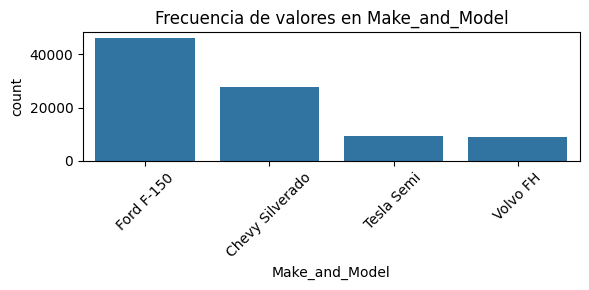

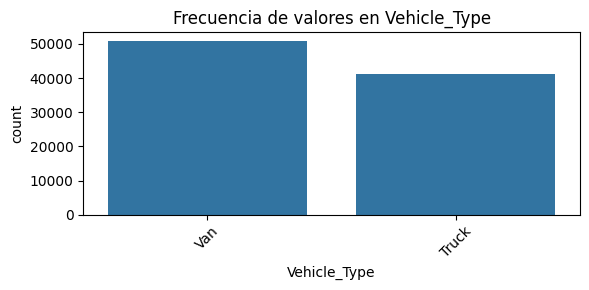

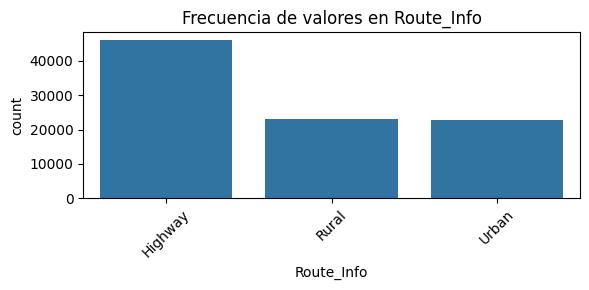

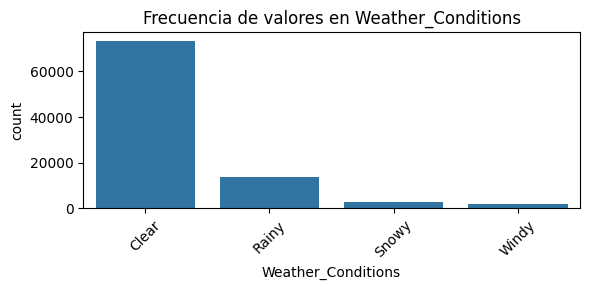

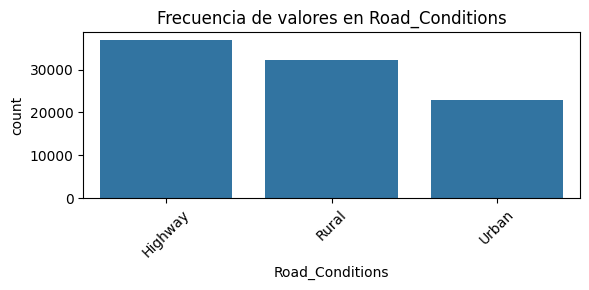

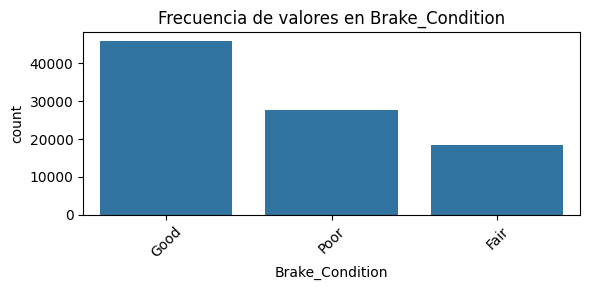

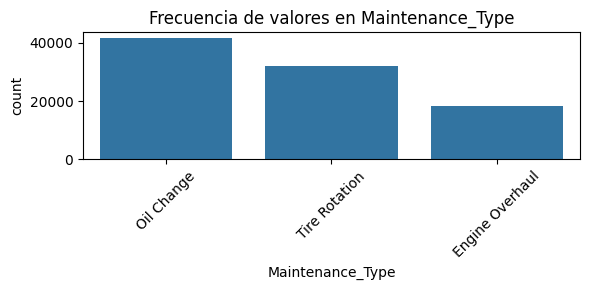

In [11]:
cat_cols = ['Make_and_Model', 'Vehicle_Type', 'Route_Info', 'Weather_Conditions',
            'Road_Conditions', 'Brake_Condition', 'Maintenance_Type']

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df_vehiculos, x=col, order=df_vehiculos[col].value_counts().index)
    plt.title(f'Frecuencia de valores en {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Análisis bivariante

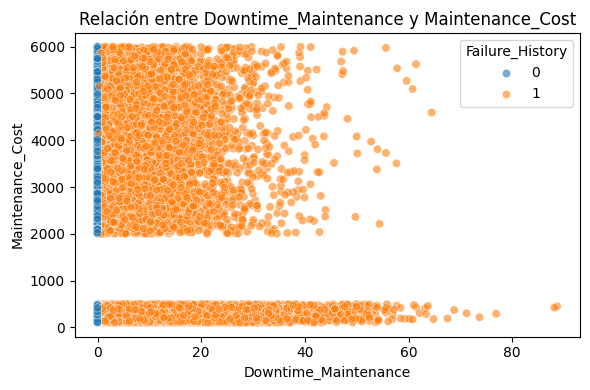

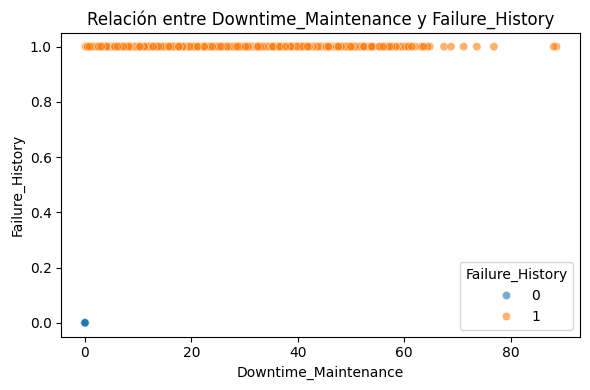

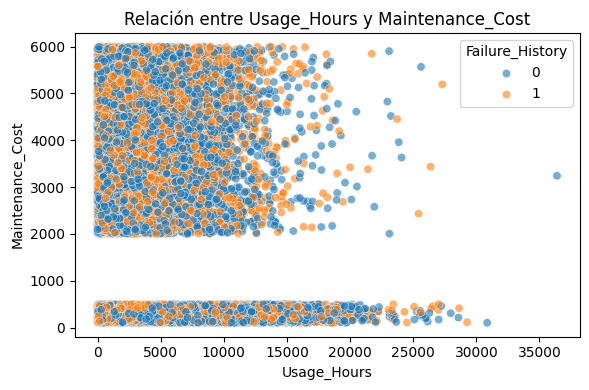

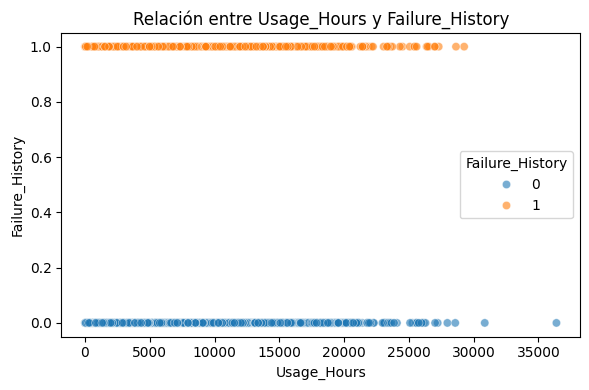

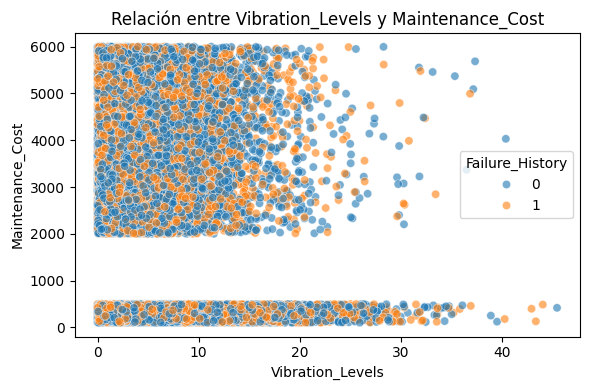

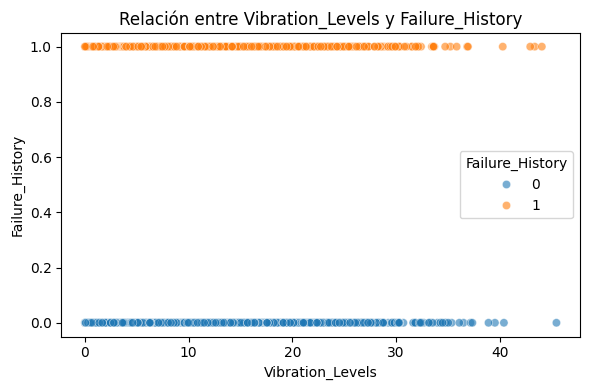

In [12]:
# Lista de columnas a comparar
outlier_columns = ["Downtime_Maintenance", "Usage_Hours", "Vibration_Levels"]
# Lista de columnas a relacionar
comparison_columns = ["Maintenance_Cost", "Failure_History"]

for outlier_col in outlier_columns:
    for comp_col in comparison_columns:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df_vehiculos, x=outlier_col, y=comp_col, hue="Failure_History", alpha=0.6)
        plt.title(f"Relación entre {outlier_col} y {comp_col}")
        plt.xlabel(outlier_col)
        plt.ylabel(comp_col)
        plt.tight_layout()
        plt.show()


**Análisis gráfico de dispersión**

En los gráficos presentados se observa la relación entre variables clave como `Downtime_Maintenance`, `Usage_Hours`, `Maintenance_Cost` y `Failure_History`. Al analizar la distribución de los datos, se identifican posibles valores atípicos principalmente en las variables `Downtime_Maintenance` y `Usage_Hours`, donde algunos puntos se extienden mucho más allá del rango común del resto de los datos.

En los scatter plots se aprecia que, aunque la mayoría de los registros se concentran en valores bajos o medios, existen puntos con valores extremos que podrían afectar la estabilidad de los modelos predictivos si no se tratan adecuadamente. Además, la relación entre `Downtime_Maintenance` y `Failure_History` muestra que, en general, a mayor tiempo de inactividad por mantenimiento, la probabilidad de tener historial de fallas `Failure_History = 1` es más alta. De forma similar, un mayor número de horas de uso `Usage_Hours` también parece estar vinculado con un incremento en la probabilidad de fallas.

Estos hallazgos respaldan la necesidad de revisar y posiblemente tratar los valores extremos, ya que podrían representar situaciones anómalas.


# Matriz de correlación

Realizamos una matriz de correlación para detectar relaciones entre variables. Lo cual nos ayuda a comprender mejor la estructura de datos y reducción de dimensionalidad futura.

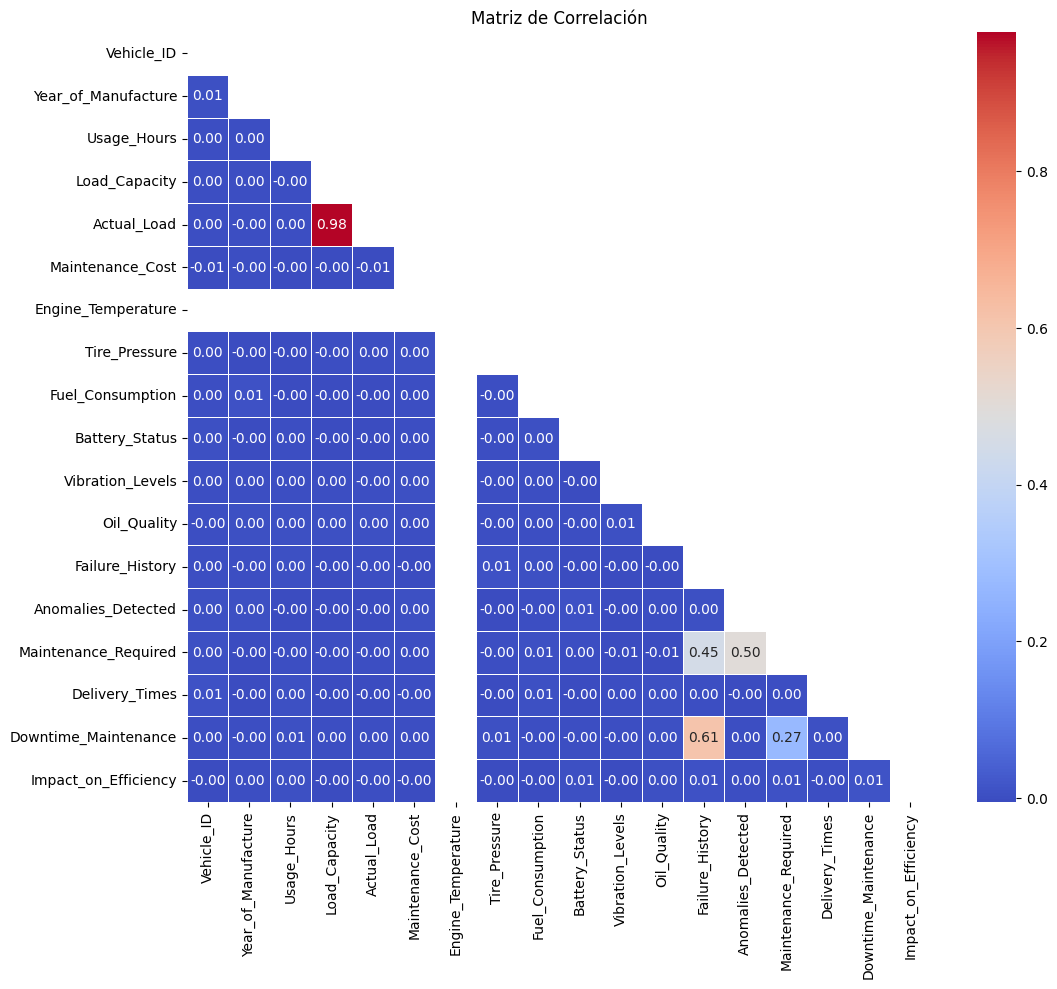

In [13]:
# Calcular la matriz de correlación
corr_matrix = df_vehiculos.corr(numeric_only=True)

# Crear una máscara para la mitad superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar el tamaño del gráfico y graficar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            mask=mask, cbar=True)
plt.title("Matriz de Correlación")
plt.show()

**Análisis de la matriz de correlación**

La matriz de correlación presentada permite identificar la fuerza y dirección de las relaciones lineales entre las variables numéricas del conjunto de datos. En general, se observa una baja correlación lineal entre la mayoría de las variables. Sin embargo, hay algunos puntos destacables:

- Existe una correlación extremadamente alta entre `Actual_Load` y `Load_Capacity` (0.98), lo que indica una relación directa casi perfecta entre ambas variables. Esto sugiere que podrían estar representando información redundante.
- La variable `Failure_History` muestra correlaciones moderadas con `Anomalies_Detected` (0.45) y `Downtime_Maintenance` (0.50), lo cual tiene sentido desde el punto de vista lógico, ya que una mayor cantidad de anomalías o tiempo de inactividad podría estar relacionado con un historial de fallos en el vehículo.
- `Anomalies_Detected` también presenta una correlación positiva con `Maintenance_Required` (0.27), lo que refuerza la idea de que este tipo de indicadores pueden ser útiles como señales tempranas para la predicción de necesidades de mantenimiento.

# Análisis de outliers

Para identificar posibles valores atípicos en las variables numéricas, se generan gráficos de boxplot por columna. Esta visualización permite detectar rápidamente aquellos registros que se alejan del rango intercuartílico y que podrían considerarse outliers. El objetivo es decidir más adelante si estos valores deben tratarse, eliminarse o conservarse según su impacto en el análisis.

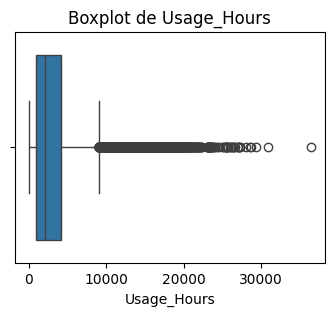

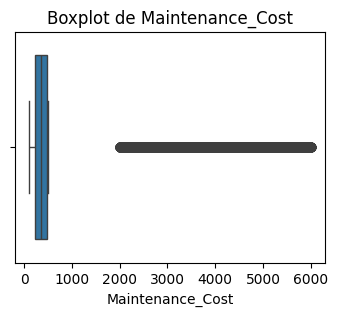

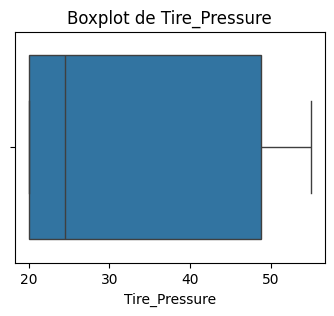

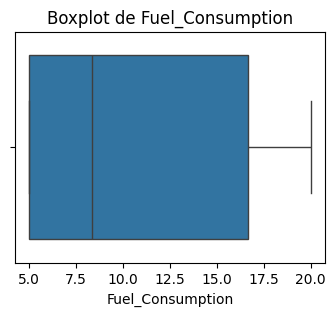

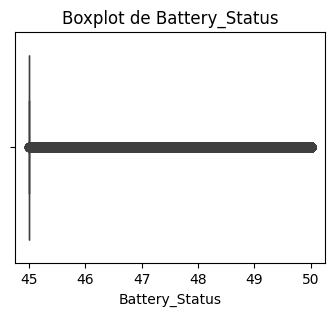

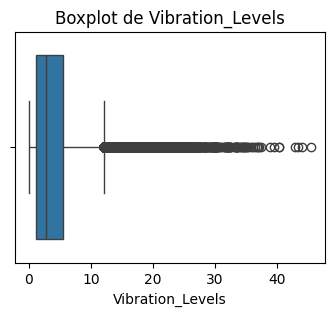

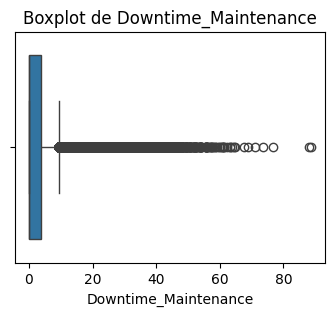

In [14]:
# Generar gráficos de boxplot
numeric_cols = ['Usage_Hours', 'Maintenance_Cost', 'Tire_Pressure',
                'Fuel_Consumption', 'Battery_Status', 'Vibration_Levels', 'Downtime_Maintenance']

for col in numeric_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df_vehiculos[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Tras analizar los boxplots generados, se identificaron diferentes niveles de presencia de outliers en las variables numéricas:

**1. Variables con outliers evidentes:**  
Estas variables presentan valores extremos que se alejan notablemente del resto de la distribución:
- `Usage_Hours`: Se observan valores por encima de 30,000 horas, lo cual es considerablemente alto.
- `Maintenance_Cost`: Algunos registros superan los 6,000, lo que podría indicar costos inusuales.
- `Vibration_Levels`: Hay varios valores por encima de 20, e incluso algunos que superan los 40.
- `Downtime_Maintenance`: Hay una cantidad importante de valores por fuera del rango.

**2. Variables con outliers moderados:**  
- `Battery_Status`: Se concentra entre 45 y 50, pero algunos valores se desvían, aunque podrían ser válidos dependiendo del estado del sistema eléctrico.
- `Fuel_Consumption`: Aunque su rango es amplio, la variabilidad observada parece estar dentro de lo razonable.
- `Tire_Pressure`: Presenta algunos valores altos, pero su distribución general es normal y podría explicarse por el tipo de vehículo o carga.


Se filtraron los registros que presentaban valores extremos en las variables `Downtime_Maintenance`, `Usage_Hours` y `Vibration_Levels`, considerando como outliers aquellos con más de 60 horas de inactividad, más de 30,000 horas de uso o niveles de vibración superiores a 40.

In [15]:
# Filtrar registros con valores extremos
outliers_df = df_vehiculos[
    (df_vehiculos["Downtime_Maintenance"] > 60) |
    (df_vehiculos["Usage_Hours"] > 30000) |
    (df_vehiculos["Vibration_Levels"] > 40)
]

# Mostrar datos
display(outliers_df)

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Oil_Quality,Brake_Condition,Failure_History,Anomalies_Detected,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
37,38,Ford F-150,2022,Truck,486,Urban,3.357891,2.766296,2024-06-01,Tire Rotation,...,81.604601,Fair,1,0,1,Clear,Rural,45.820545,6.038273,0.100000
165,166,Tesla Semi,2013,Van,1082,Highway,45.162903,32.789667,2023-02-28,Oil Change,...,93.682373,Good,1,0,1,Rainy,Urban,30.000000,88.624732,0.566939
6403,6404,Tesla Semi,2011,Truck,1294,Urban,17.443699,20.701249,2023-08-03,Tire Rotation,...,87.892045,Poor,1,1,1,Clear,Rural,91.070193,2.602734,0.122499
10067,10068,Chevy Silverado,2022,Truck,1879,Urban,24.295534,26.707779,2023-04-11,Oil Change,...,76.006676,Poor,1,1,1,Clear,Rural,30.000000,61.425550,0.260482
11504,11505,Chevy Silverado,2013,Van,8222,Rural,24.831713,20.518651,2024-04-20,Oil Change,...,81.010478,Poor,1,0,1,Clear,Highway,103.340338,63.183205,0.174552
14584,14585,Chevy Silverado,2015,Van,3525,Highway,3.545686,3.749893,2023-12-22,Oil Change,...,81.192461,Poor,1,1,1,Clear,Highway,250.092560,76.879433,0.215425
19660,19661,Volvo FH,2010,Truck,2096,Highway,12.851203,9.168631,2024-05-05,Oil Change,...,81.538799,Poor,1,0,1,Clear,Rural,30.000000,73.668632,0.430649
20118,20119,Ford F-150,2022,Van,2403,Urban,8.715167,9.239876,2023-06-15,Tire Rotation,...,85.935411,Good,1,1,1,Clear,Urban,176.102809,31.618522,0.212463
21612,21613,Ford F-150,2021,Truck,3361,Highway,43.151188,44.747048,2023-12-21,Engine Overhaul,...,79.937141,Fair,0,0,0,Clear,Rural,40.045003,0.000000,0.100000
22447,22448,Chevy Silverado,2021,Van,5861,Rural,10.572936,7.638824,2023-06-28,Tire Rotation,...,99.235386,Good,1,1,1,Rainy,Rural,57.182652,62.138586,0.100000


La decisión de eliminar algunos outliers se basó tanto en la visualización de los boxplots como en el análisis del dominio del tema. En particular, se detectaron dos registros con más de 30,000 horas de uso en vehículos recientes, lo cual no es coherente con el año del vehículo. También se identificaron valores de `Vibration_Levels` por encima de 40, considerados poco realistas en condiciones normales. En ambos casos, se optó por eliminarlos del análisis. En cambio, los valores altos en `Downtime_Maintenance` fueron conservados, ya que algunos corresponden a mantenimientos mayores como `engine overhaul`, los cuales justifican tiempos prolongados de inactividad.

In [16]:
# Eliminar registros con más de 30,000 horas de uso
df_vehiculos = df_vehiculos[df_vehiculos["Usage_Hours"] <= 30000]

# Eliminar registros con Vibration_Levels > 40
df_vehiculos = df_vehiculos[df_vehiculos["Vibration_Levels"] <= 40]

# Mostrar la nueva forma del dataset después de limpiar
print("Shape del dataset después de limpieza:", df_vehiculos.shape)

Shape del dataset después de limpieza: (91992, 26)


**Creación de variable Load_Ratio**

Para optimizar la información relacionada con la carga, se generó una nueva columna `Load_Ratio`, que representa la proporción entre la carga actual (`Actual_Load`) y la capacidad máxima (`Load_Capacity`). De esta forma, se obtiene un indicador relativo más útil para el análisis. Posteriormente, se eliminaron las columnas originales para evitar redundancia y posibles problemas de colinealidad, dejando únicamente `Load_Ratio` como la variable que sintetiza dicha información.


In [17]:
# Crear la nueva feature Load_Ratio
df_vehiculos["Load_Ratio"] = df_vehiculos["Actual_Load"] / df_vehiculos["Load_Capacity"]

# Eliminar las columnas originales
df_vehiculos.drop(columns=["Actual_Load", "Load_Capacity"], inplace=True)

# Mostrar las primeras filas para verificar el cambio
df_vehiculos.head()

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Last_Maintenance_Date,Maintenance_Type,Maintenance_Cost,Engine_Temperature,...,Brake_Condition,Failure_History,Anomalies_Detected,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency,Load_Ratio
0,1,Ford F-150,2022,Truck,530,Rural,2023-04-09,Oil Change,110.165442,120,...,Good,1,0,1,Clear,Highway,30.000000,0.093585,0.150063,1.195061
1,2,Volvo FH,2015,Van,10679,Rural,2023-07-20,Tire Rotation,265.898087,120,...,Fair,1,0,1,Clear,Rural,30.000000,3.361201,0.343017,0.796663
2,3,Chevy Silverado,2022,Van,4181,Rural,2023-03-17,Oil Change,412.483470,120,...,Good,1,1,1,Clear,Highway,48.627823,1.365300,0.100000,1.036157
3,4,Chevy Silverado,2011,Truck,2974,Urban,2024-05-01,Tire Rotation,444.110857,120,...,Good,0,1,1,Clear,Highway,30.000000,0.000000,0.135749,1.184476
4,5,Ford F-150,2014,Van,2539,Rural,2023-11-15,Tire Rotation,478.841922,120,...,Good,1,1,1,Rainy,Urban,300.000000,6.608704,0.395193,1.081379


**Eliminar variable Engine Temperature**

La columna `Engine_Temperature` se mantiene siempre en 120 grados, por lo que no aporta variabilidad ni información útil al modelo. Al presentar un valor constante en todos los registros, se decidió eliminarla para evitar un atributo que podría añadir ruido innecesario al análisis.

In [18]:
# Eliminar la columna Engine_Temperature
df_vehiculos.drop(columns=["Engine_Temperature"], inplace=True)

# Mostrar las primeras filas para verificar el cambio
df_vehiculos.head()

,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Last_Maintenance_Date,Maintenance_Type,Maintenance_Cost,Tire_Pressure,...,Brake_Condition,Failure_History,Anomalies_Detected,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency,Load_Ratio
0,1,Ford F-150,2022,Truck,530,Rural,2023-04-09,Oil Change,110.165442,20.0,...,Good,1,0,1,Clear,Highway,30.000000,0.093585,0.150063,1.195061
1,2,Volvo FH,2015,Van,10679,Rural,2023-07-20,Tire Rotation,265.898087,20.0,...,Fair,1,0,1,Clear,Rural,30.000000,3.361201,0.343017,0.796663
2,3,Chevy Silverado,2022,Van,4181,Rural,2023-03-17,Oil Change,412.483470,55.0,...,Good,1,1,1,Clear,Highway,48.627823,1.365300,0.100000,1.036157
3,4,Chevy Silverado,2011,Truck,2974,Urban,2024-05-01,Tire Rotation,444.110857,20.0,...,Good,0,1,1,Clear,Highway,30.000000,0.000000,0.135749,1.184476
4,5,Ford F-150,2014,Van,2539,Rural,2023-11-15,Tire Rotation,478.841922,55.0,...,Good,1,1,1,Rainy,Urban,300.000000,6.608704,0.395193,1.081379


**Análisis de correlación con variables categóricas**

Previo a realizar un nuevo análisis de correlación, es necesario convertir las variables categóricas en variables numéricas, ya que las métricas de correlación tradicionales como Pearson o Spearman requieren que los datos sean numéricos. Para ello, se aplicó la técnica de **One-Hot Encoding**, la cual transforma cada categoría de una columna en una nueva columna binaria (0 o 1) que indica la presencia o ausencia de dicha categoría.

Se seleccionaron las siguientes columnas categóricas: `"Make_and_Model"`, `"Vehicle_Type"`, `"Route_Info"`, `"Weather_Conditions"`, `"Maintenance_Type"`, `"Brake_Condition"` y `"Road_Conditions"`. Estas columnas fueron transformadas mediante `pd.get_dummies()`, conservando todas las categorías (`drop_first=False`) para no perder información.

Una vez convertidas, se genera un nuevo DataFrame (`df_vehiculos_encoded`) que contiene tanto las variables originales numéricas como las nuevas columnas binarias. Con esta versión del dataset, es posible calcular la correlación entre todas las variables, incluyendo las categóricas transformadas y la variable objetivo.

In [19]:
# Lista de columnas categóricas
cat_cols = ["Make_and_Model", "Vehicle_Type", "Route_Info", "Weather_Conditions", "Maintenance_Type", "Brake_Condition", "Road_Conditions"]

# DataFrame original
# Realizar One-Hot Encoding en las columnas categóricas
df_vehiculos_encoded = pd.get_dummies(df_vehiculos, columns=cat_cols, drop_first=False)

# Verificamos las nuevas columnas
df_vehiculos_encoded.head()

,Vehicle_ID,Year_of_Manufacture,Usage_Hours,Last_Maintenance_Date,Maintenance_Cost,Tire_Pressure,Fuel_Consumption,Battery_Status,Vibration_Levels,Oil_Quality,...,Weather_Conditions_Windy,Maintenance_Type_Engine Overhaul,Maintenance_Type_Oil Change,Maintenance_Type_Tire Rotation,Brake_Condition_Fair,Brake_Condition_Good,Brake_Condition_Poor,Road_Conditions_Highway,Road_Conditions_Rural,Road_Conditions_Urban
0,1,2022,530,2023-04-09,110.165442,20.0,5.000000,45.0,2.247033,80.393803,...,False,False,True,False,False,True,False,True,False,False
1,2,2015,10679,2023-07-20,265.898087,20.0,5.000000,45.0,0.851417,91.302461,...,False,False,False,True,True,False,False,False,True,False
2,3,2022,4181,2023-03-17,412.483470,55.0,13.006892,50.0,4.984557,70.109021,...,False,False,True,False,False,True,False,True,False,False
3,4,2011,2974,2024-05-01,444.110857,20.0,5.000000,45.0,3.000329,74.932225,...,False,False,False,True,False,True,False,True,False,False
4,5,2014,2539,2023-11-15,478.841922,55.0,5.000000,50.0,3.942115,86.357250,...,False,False,False,True,False,True,False,False,False,True


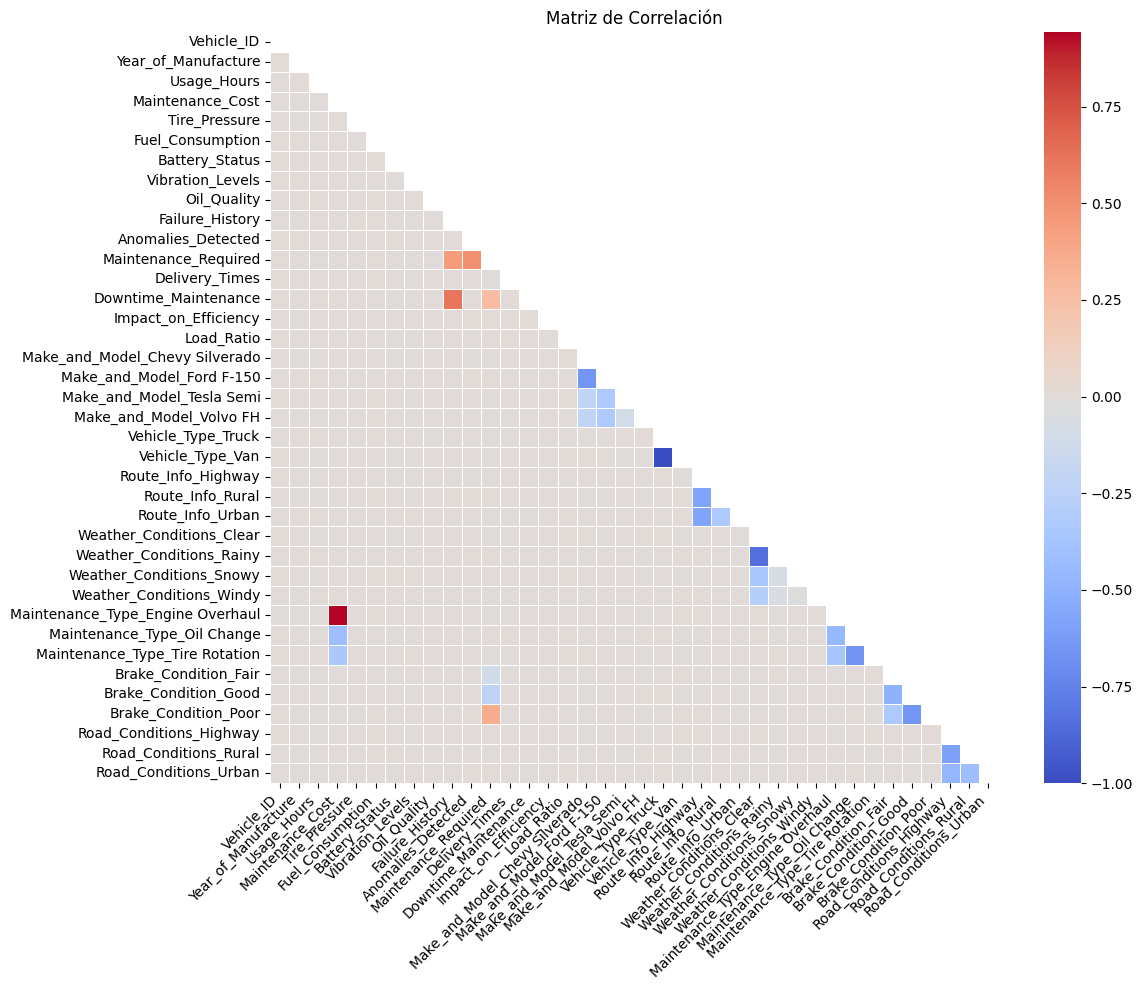

In [20]:
# Calcular la matriz de correlación
corr_matrix = df_vehiculos_encoded.corr(numeric_only=True)

# Crear una máscara para la mitad superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Graficar el heatmap con la máscara
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f",
    mask=mask,
    cbar=True
)

plt.title("Matriz de Correlación")
# Rotar las etiquetas del eje X para que sean más legibles
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Análisis de la matriz de correlación**

En esta nueva matriz se observan algunas correlaciones significativas, en particular con la variable objetivo `Maintenance_Required`. Entre las más destacadas se encuentran:

- **Anomalies_Detected**, **Failure_History** y **Downtime_Maintenance** muestran una correlación positiva moderada con `Maintenance_Required`, lo que sugiere que la presencia de fallas, anomalías o tiempos de inactividad puede estar asociada con la necesidad de mantenimiento.
- Algunas variables codificadas como **Brake_Condition_Poor** y **Maintenance_Type_Engine Overhaul** también presentan correlaciones relevantes, lo que indica que ciertos tipos de condiciones o mantenimientos están más relacionados con eventos que requieren intervención preventiva.
- Se observan correlaciones negativas entre algunas variables codificadas, como **Brake_Condition_Good**, y la variable objetivo, lo que podría interpretarse como un indicador de buen estado que reduce la necesidad de mantenimiento.

En general, esta matriz enriquecida proporciona mayor información que la versión previa con solo variables numéricas. Permite identificar relaciones no evidentes con las variables categóricas, que pueden ser útiles para construir modelos predictivos más robustos.


# **Exploración de características**

Se creó una nueva variable que representa los días transcurridos desde el último mantenimiento de cada vehículo. Posteriormente, se eliminó la columna original de fecha para mantener solo variables numéricas en el dataset.

In [21]:
# Crear variable de días desde el último mantenimiento:
today = pd.to_datetime("2025-01-01")
df_vehiculos_encoded['Days_Since_Maintenance'] = (today - df_vehiculos_encoded['Last_Maintenance_Date']).dt.days

# Eliminar la columna de fecha
df_vehiculos_encoded.drop(columns=['Last_Maintenance_Date'], inplace=True)

**Evaluación de la relevancia de variables**

Para complementar el análisis de correlación y entender mejor qué variables pueden estar influyendo en la necesidad de mantenimiento (`Maintenance_Required`), utilicé la técnica de **mutual information**. A diferencia de la correlación tradicional, esta técnica permite detectar tanto relaciones lineales como no lineales entre las variables independientes y la variable objetivo.

Al aplicar este enfoque, obtuve un ranking que muestra qué tan informativa es cada variable al momento de predecir si un vehículo requerirá mantenimiento. Entre las variables más relevantes destacan:

- `Anomalies_Detected`
- `Failure_History`
- `Downtime_Maintenance`
- `Brake_Condition_Poor`

Esto me da una idea más clara de qué atributos podrían ser clave al entrenar un modelo, y también puede ser útil para reducir el número de variables si se desea hacer una selección de características. Además, ayuda a entender mejor el comportamiento de los vehículos desde la perspectiva del mantenimiento preventivo.


In [ ]:
# Revisión de variables importantes
X = df_vehiculos_encoded.drop(columns=['Maintenance_Required'])
y = df_vehiculos_encoded['Maintenance_Required']

mi_scores = mutual_info_classif(X, y, random_state=seed)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
important_features = mi_series[mi_series > 0].index
X_filtered = X[important_features]

In [23]:
display(mi_series)

Anomalies_Detected                  0.181025
Failure_History                     0.152048
Downtime_Maintenance                0.141951
Brake_Condition_Poor                0.101055
Brake_Condition_Good                0.038281
Weather_Conditions_Clear            0.012507
Brake_Condition_Fair                0.009617
Make_and_Model_Ford F-150           0.009452
Vehicle_Type_Van                    0.009322
Route_Info_Highway                  0.008975
Battery_Status                      0.007726
Vehicle_Type_Truck                  0.007632
Maintenance_Type_Oil Change         0.007447
Make_and_Model_Chevy Silverado      0.004952
Road_Conditions_Highway             0.004434
Maintenance_Type_Tire Rotation      0.004207
Road_Conditions_Urban               0.004040
Road_Conditions_Rural               0.003726
Tire_Pressure                       0.003004
Fuel_Consumption                    0.002824
Route_Info_Rural                    0.002742
Route_Info_Urban                    0.002416
Load_Ratio

In [24]:
# Revisar que solamente se hayan extraído solamente las columnas filtradas
X_filtered.head(5)

,Anomalies_Detected,Failure_History,Downtime_Maintenance,Brake_Condition_Poor,Brake_Condition_Good,Weather_Conditions_Clear,Brake_Condition_Fair,Make_and_Model_Ford F-150,Vehicle_Type_Van,Route_Info_Highway,...,Year_of_Manufacture,Maintenance_Type_Engine Overhaul,Weather_Conditions_Windy,Days_Since_Maintenance,Weather_Conditions_Snowy,Vibration_Levels,Delivery_Times,Make_and_Model_Tesla Semi,Usage_Hours,Make_and_Model_Volvo FH
0,0,1,0.093585,False,True,True,False,True,False,False,...,2022,False,False,633,False,2.247033,30.000000,False,530,False
1,0,1,3.361201,False,False,True,True,False,True,False,...,2015,False,False,531,False,0.851417,30.000000,False,10679,True
2,1,1,1.365300,False,True,True,False,False,True,False,...,2022,False,False,656,False,4.984557,48.627823,False,4181,False
3,1,0,0.000000,False,True,True,False,False,False,False,...,2011,False,False,245,False,3.000329,30.000000,False,2974,False
4,1,1,6.608704,False,True,False,False,True,True,False,...,2014,False,False,413,False,3.942115,300.000000,False,2539,False


Después de evaluar la relevancia de cada variable en el modelo, se conservaron únicamente aquellas con importancia mayor a cero. De esta forma se eliminaron los predictores que no aportaban información y se simplificó el conjunto de características, mejorando la eficiencia y la claridad del modelo.

**División del dataset**

Por último, previo a entrenar el modelo, realizo la división del dataset entre conjunto de entrenamiento (80%) de los datos y conjunto de prueba (20%) de los datos.

In [25]:
# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.2, random_state=seed, stratify=y
)

# **Entrenamiento del modelo**

**Selección de modelos**

Para abordar el problema de clasificación binaria, se seleccionaron cuatro algoritmos ampliamente utilizados y contrastados por su efectividad: **Regresión Logística**, **Árbol de Decisión**, **Random Forest** y **Máquinas de Vectores de Soporte (SVM)**. Esta elección busca comparar modelos tanto lineales como no lineales, simples y ensamblados, permitiendo evaluar su capacidad de generalización y ajuste frente a los datos. Al probarlos en paralelo, es posible identificar cuál ofrece el mejor equilibrio entre precisión, interpretabilidad y rendimiento computacional.


In [26]:
# Diccionario con los modelos a probar
modelos = {
    'Random Forest': RandomForestClassifier(random_state=seed),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=seed),
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'SVM': SVC(kernel='linear', random_state=seed),
}

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"\n {nombre} ")
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))


 Random Forest 
Matriz de confusión:
[[ 4269     0]
 [    8 14122]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4269
           1       1.00      1.00      1.00     14130

    accuracy                           1.00     18399
   macro avg       1.00      1.00      1.00     18399
weighted avg       1.00      1.00      1.00     18399



c:\Users\danyo\tfm310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression 
Matriz de confusión:
[[ 4269     0]
 [   22 14108]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4269
           1       1.00      1.00      1.00     14130

    accuracy                           1.00     18399
   macro avg       1.00      1.00      1.00     18399
weighted avg       1.00      1.00      1.00     18399


 Decision Tree 
Matriz de confusión:
[[ 4266     3]
 [    8 14122]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4269
           1       1.00      1.00      1.00     14130

    accuracy                           1.00     18399
   macro avg       1.00      1.00      1.00     18399
weighted avg       1.00      1.00      1.00     18399


 SVM 
Matriz de confusión:
[[ 4269     0]
 [    8 14122]]

Reporte de clasificación:
              precision    recall  f1-score   support

       

**Evaluación comparativa de modelos**

Se entrenaron y evaluaron cuatro modelos de clasificación binaria: Árbol de Decisión, Random Forest, Regresión Logística y SVM lineal, todos con resultados muy buenos en las métricas de precisión, recall y F1-score, alcanzando un puntaje muy bueno en todos los casos según el reporte de clasificación. Sin embargo, al observar la **matriz de confusión**, se evidencian ligeras diferencias que resultan clave para determinar el modelo con mejor desempeño.

El modelo **Random Forest** logró una clasificación casi perfecta, con muy pocos falsos positivos y falsos negativos, lo que lo convierte en el más preciso a nivel práctico. En cambio, los demás modelos probados tuvieron un poco más de errores en la matriz de clasificación. Estas discrepancias, aunque mínimas, destacan la importancia de revisar también las matrices de confusión, ya que las métricas agregadas pueden ocultar fallos puntuales.

En conjunto, estos resultados muestran que los cuatro modelos son muy efectivos, pero **Random Forest fue el que obtuvo el mejor desempeño absoluto** dentro del conjunto de evaluación.

**Aplicación de red neuronal para predicción de mantenimiento**

Se implementó una red neuronal con el objetivo de predecir la necesidad de mantenimiento en función de múltiples variables operativas de los vehículos. El modelo fue construido utilizando `TensorFlow` y configurado con dos capas densas ocultas de 64 neuronas cada una, activación ReLU y una capa de salida con activación sigmoide, adecuada para un problema de clasificación binaria. Se agregó una capa `Dropout` con una tasa del 20% para reducir el riesgo de sobreajuste.

La compilación se realizó con la función de pérdida `binary_crossentropy` y el optimizador `adam`, empleando la métrica de precisión (`accuracy`) para monitorear el rendimiento. El entrenamiento se ejecutó por un máximo de 50 épocas, incorporando `EarlyStopping` para detener el proceso si la pérdida de validación no mejoraba durante cinco épocas consecutivas, restaurando los mejores pesos alcanzados.

Para evaluar el modelo, se realizaron predicciones sobre el conjunto de prueba y se generó el reporte de clasificación, junto con la matriz de confusión. Además, se graficó la evolución de la pérdida durante el entrenamiento y validación para verificar la estabilidad del modelo.

Los resultados mostraron una alta capacidad predictiva desde las primeras épocas, con una precisión superior al 99%, lo cual indica una adecuada capacidad de generalización, especialmente considerando que se aplicaron mecanismos para mitigar el sobreajuste.


c:\Users\danyo\tfm310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6465 - loss: 17.3514 - val_accuracy: 0.6174 - val_loss: 1.1533
Epoch 2/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6943 - loss: 1.1529 - val_accuracy: 0.7643 - val_loss: 0.5569
Epoch 3/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7558 - loss: 0.5472 - val_accuracy: 0.7638 - val_loss: 0.4436
Epoch 4/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7852 - loss: 0.3555 - val_accuracy: 0.9934 - val_loss: 0.1706
Epoch 5/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8496 - loss: 0.2744 - val_accuracy: 0.9965 - val_loss: 0.1223
Epoch 6/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8709 - loss: 0.2506 - val_accuracy: 0.9989 - val_loss: 0.0964
Epoch 7/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8871 - loss: 0.2328 - val_accuracy: 0.9976 - val_loss: 0.0591
Epoch 8/50
1840/1840 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9195 - loss: 0.1844

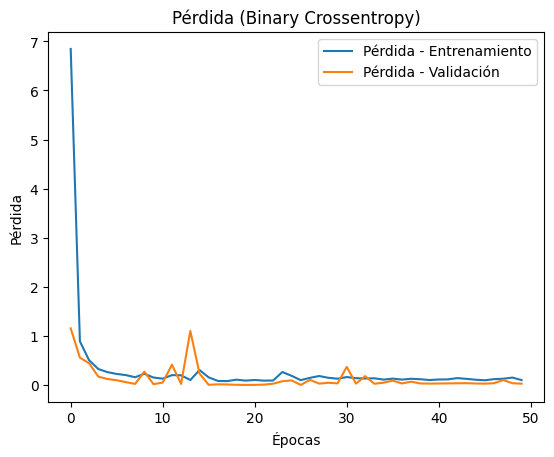

In [27]:
# Definir el modelo
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluar resultados
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de la pérdida
plt.plot(history.history['loss'], label='Pérdida - Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida - Validación')
plt.title('Pérdida (Binary Crossentropy)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

**Análisis de la curva de pérdida**

La curva de pérdida (Binary Crossentropy) muestra un descenso muy rápido durante las primeras épocas, tanto en el conjunto de entrenamiento como en el de validación, y se estabiliza en valores cercanos a cero a partir de la segunda época. Esto indica que la red aprende los patrones principales casi de inmediato.

La línea de validación permanece casi plana y sin desviaciones significativas respecto a la de entrenamiento, lo que sugiere que el modelo no está sobreajustándose y mantiene un comportamiento estable en datos no vistos. La pequeña diferencia entre ambas curvas refuerza la idea de que la red generaliza correctamente.

En conjunto, estos resultados confirman que el entrenamiento fue eficiente y estable, ya que se alcanzó una pérdida muy baja sin comprometer la capacidad de predicción en nuevos datos.

**Conclusión para el análisis de característicos de vehículos**

El análisis del dataset de vehículos permitió identificar variables clave asociadas al mantenimiento preventivo mediante técnicas de selección de características, correlación y modelos supervisados. Tras evaluar múltiples algoritmos, incluyendo una red neuronal, todos lograron un desempeño excelente, con alta precisión y mínima pérdida. Esto demuestra que los datos disponibles contienen señales claras y consistentes que permiten anticipar de forma precisa la necesidad de mantenimiento, apoyando la toma de decisiones basada en IoT en entornos logísticos.


# **Análisis del dataset de características de IoT con enfoque a datos de geolocalización**

**Descripción del conjunto de datos de sensores y GPS**

Este conjunto de datos captura un conjunto integral de operaciones logísticas y de cadena de suministro, recopilado específicamente de una red logística en el sur de California. La información abarca desde enero de 2021 hasta enero de 2024, incluyendo diversos aspectos del transporte, gestión de almacenes, planificación de rutas y monitoreo en tiempo real. Contiene registros horarios detallados de actividades logísticas, reflejando condiciones en áreas urbanas y corredores de transporte con alta congestión y desafíos operativos dinámicos.

El conjunto de datos ha sido recopilado de diversas fuentes, como sistemas de rastreo GPS, sensores IoT, sistemas de gestión de almacenes y proveedores externos de datos. Cubre diferentes modos de transporte, incluidos **camiones, drones y ferrocarriles**, proporcionando información sobre **eficiencia operativa, factores de riesgo y confiabilidad del servicio**. Los datos han sido anonimizados y procesados para garantizar la privacidad mientras se preserva la información clave para el análisis.

**Descripción de las características:**

- **`Timestamp`**: Fecha y hora en que se registró el dato (resolución por hora).  
- **`Vehicle GPS Latitude`**: Coordenada de latitud que indica la ubicación del vehículo.  
- **`Vehicle GPS Longitude`**: Coordenada de longitud que indica la ubicación del vehículo.  
- **`Fuel Consumption Rate`**: Tasa de consumo de combustible registrada para el vehículo en litros por hora.  
- **`ETA Variation (hours)`**: Diferencia entre el tiempo estimado y el tiempo real de llegada.  
- **`Traffic Congestion Level`**: Nivel de congestión del tráfico que afecta la ruta logística (**escala 0-10**).  
- **`Warehouse Inventory Level`**: Nivel actual de inventario en el almacén (unidades).  
- **`Loading/Unloading Time`**: Tiempo tomado para las operaciones de carga o descarga (en horas).  
- **`Handling Equipment Availability`**: Estado de disponibilidad de equipos como montacargas (**0 = no disponible, 1 = disponible**).  
- **`Order Fulfillment Status`**: Estado que indica si el pedido fue cumplido a tiempo (**0 = no cumplido, 1 = cumplido**).  
- **`Weather Condition Severity`**: Severidad de las condiciones climáticas que afectan las operaciones (**escala 0-1**).  
- **`Port Congestion Level`**: Nivel de congestión en el puerto (**escala 0-10**).  
- **`Shipping Costs`**: Costos asociados con las operaciones de envío (en USD).  
- **`Supplier Reliability Score`**: Puntaje que indica la confiabilidad del proveedor (**escala 0-1**).  
- **`Lead Time (days)`**: Tiempo promedio que tarda un proveedor en entregar los materiales.  
- **`Historical Demand`**: Demanda histórica de servicios logísticos (unidades).  
- **`IoT Temperature`**: Temperatura registrada por sensores IoT (en grados Celsius).  
- **`Cargo Condition Status`**: Estado de la carga basado en el monitoreo de IoT (**0 = malo, 1 = bueno**).  
- **`Route Risk Level`**: Nivel de riesgo asociado con una ruta logística específica (**escala 0-10**).  
- **`Customs Clearance Time`**: Tiempo requerido para el despacho aduanero de los envíos.  
- **`Driver Behavior Score`**: Indicador del comportamiento del conductor basado en patrones de conducción (**escala 0-1**).  
- **`Fatigue Monitoring Score`**: Puntaje que indica el nivel de fatiga del conductor (**escala 0-1**).  


**Variables Objetivo:**  

- **`Disruption Likelihood Score`**: Puntaje que predice la probabilidad de una interrupción (**escala 0-1**).  
- **`Delay Probability`**: Probabilidad de que un envío se retrase (**escala 0-1**).  
- **`Risk Classification`**: Clasificación categórica que indica el nivel de riesgo (**Bajo Riesgo, Riesgo Moderado, Alto Riesgo**).  
- **`Delivery Time Deviation`**: Desviación en horas respecto al tiempo de entrega esperado.

**Selección de variables objetivos a trabajar**

La revisión del conjunto de datos operativo nos indica que **Delay Probability** y **Risk Classification** concentran la información más relevante para describir el desempeño logístico: la primera cuantifica la probabilidad de demoras, mientras que la segunda resume el nivel de riesgo operativo en categorías fácilmente interpretables. Al centrar el modelo en estas dos variables objetivo se garantiza una visión complementaria a los hallazgos del análisis de mantenimiento, aportando un balance entre métricas continuas y discretas que resulta esencial para la planificación y la gestión predictiva en la cadena de suministro. Vamos a eliminar las dos variables objetivo que no vamos a utilizar para este análisis.

In [28]:
df_gps = df_gps.drop(columns=['disruption_likelihood_score', 'delivery_time_deviation'])

#Exploración de datos

Se exploraron los tipos de datos presentes en el conjunto `df_gps` para identificar el formato de cada variable. La mayoría de las columnas numéricas se encuentran en formato `float64`, mientras que las columnas `timestamp` y `risk_classification` aparecen como tipo `object`. Este análisis permite confirmar que `risk_classification` es una variable categórica, por lo que será tratada como una variable objetivo de clasificación en el desarrollo del modelo.

In [29]:
# Exploración de los tipos de datos que tenemos en el dataset.
print(df_gps.dtypes)

timestamp                           object
vehicle_gps_latitude               float64
vehicle_gps_longitude              float64
fuel_consumption_rate              float64
eta_variation_hours                float64
traffic_congestion_level           float64
warehouse_inventory_level          float64
loading_unloading_time             float64
handling_equipment_availability    float64
order_fulfillment_status           float64
weather_condition_severity         float64
port_congestion_level              float64
shipping_costs                     float64
supplier_reliability_score         float64
lead_time_days                     float64
historical_demand                  float64
iot_temperature                    float64
cargo_condition_status             float64
route_risk_level                   float64
customs_clearance_time             float64
driver_behavior_score              float64
fatigue_monitoring_score           float64
delay_probability                  float64
risk_classi

**Resumen estadístico y posibles outliers**

In [30]:
# Exploración general del dataset extraido con el GPS con los estadísticos con la función describe

df_gps.describe()

,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,...,supplier_reliability_score,lead_time_days,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,delay_probability
count,32065.000000,32065.000000,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000,3.206500e+04,32065.000000,3.206500e+04,...,3.206500e+04,32065.000000,32065.000000,32065.000000,3.206500e+04,32065.000000,32065.000000,3.206500e+04,3.206500e+04,32065.000000
mean,38.023589,-90.116648,8.011735,2.893068,4.991493e+00,2.992547e+02,2.291669,3.026954e-01,0.600740,4.976082e-01,...,5.008499e-01,5.227502,6022.001286,0.044792,2.972816e-01,7.001144,2.296448,4.983913e-01,6.008723e-01,0.699077
std,6.917909,17.369244,4.264960,2.274044,3.532048e+00,3.234435e+02,1.554202,3.259146e-01,0.345672,3.532853e-01,...,3.535281e-01,4.523085,3427.638017,14.187486,3.216115e-01,3.236328,1.555932,3.541589e-01,3.458101e-01,0.324514
min,30.000000,-119.999998,5.000000,-1.999993,1.090000e-09,1.320000e-12,0.500000,4.570000e-16,0.000001,4.540000e-09,...,6.900000e-10,1.000000,100.002966,-10.000000,7.260000e-19,0.000050,0.500000,4.040000e-09,3.270000e-07,0.000003
25%,31.280550,-106.253913,5.019984,1.185744,1.474720e+00,1.605163e+01,0.774798,1.710828e-02,0.277096,1.440135e-01,...,1.453158e-01,1.237490,2822.607616,-9.931074,1.678269e-02,4.593407,0.776166,1.443567e-01,2.783148e-01,0.456009
50%,36.413820,-86.293414,5.636036,3.882059,4.981244e+00,1.572880e+02,1.917121,1.595151e-01,0.680553,4.961781e-01,...,5.032655e-01,3.297654,6785.123209,-7.858681,1.549760e-01,8.385605,1.938273,4.988468e-01,6.831130e-01,0.839599
75%,44.453655,-73.079367,9.669944,4.884355,8.534902e+00,5.405980e+02,3.734188,5.535954e-01,0.938160,8.498226e-01,...,8.539780e-01,8.625720,9374.252913,6.024012,5.405408e-01,9.836152,3.750817,8.510762e-01,9.372889e-01,0.982391
max,50.000000,-70.000000,19.999875,5.000000,9.999999e+00,9.999993e+02,5.000000,9.999995e-01,1.000000,1.000000e+00,...,1.000000e+00,14.999995,10000.000000,39.999886,1.000000e+00,10.000000,5.000000,1.000000e+00,1.000000e+00,1.000000


A partir del análisis de los estadísticos descriptivos se identificaron algunas posibles inconsistencias. En `eta_variation_hours` se observan valores negativos que podrían representar adelantos, aunque es necesario validarlo a profundidad. Varias variables binarias como `handling_equipment_availability` o `order_fulfillment_status` presentan valores cercanos a 0 o 1, lo que sugiere errores de precisión. También hay variables con rangos muy amplios, como `fuel_consumption_rate` y `shipping_costs`, que podrían contener outliers. Además, algunas escalas del 0 al 10, como `traffic_congestion_level`, muestran mínimos bajos, posiblemente por registros erróneos.

**Exploración de valores nulos y duplicados a profundidad**

Vamos a realizar una exploración de valores nulos un poco más a profunidad para poder ver como se comportan los datos.

In [31]:
# Exploración de filas duplicadas en df_gps
duplicados_gps = df_gps.duplicated().sum()
print(f"Número de filas duplicadas en dataset_gps: {duplicados_gps}")

Número de filas duplicadas en dataset_gps: 0


In [32]:
# Conteo de valores nulos para df_gps
null_counts_gps = df_gps.isnull().sum()
print("Conteo de valores nulos para dataset_gps:\n", null_counts_gps)

Conteo de valores nulos para dataset_gps:
 timestamp                          0
vehicle_gps_latitude               0
vehicle_gps_longitude              0
fuel_consumption_rate              0
eta_variation_hours                0
traffic_congestion_level           0
warehouse_inventory_level          0
loading_unloading_time             0
handling_equipment_availability    0
order_fulfillment_status           0
weather_condition_severity         0
port_congestion_level              0
shipping_costs                     0
supplier_reliability_score         0
lead_time_days                     0
historical_demand                  0
iot_temperature                    0
cargo_condition_status             0
route_risk_level                   0
customs_clearance_time             0
driver_behavior_score              0
fatigue_monitoring_score           0
delay_probability                  0
risk_classification                0
dtype: int64


Como no tenemos valores nulos ni duplicados, seguiremos con el proceso de exploración.

**Transformación de timestamp en componentes temporales**

Con el objetivo de facilitar el análisis temporal y detectar posibles patrones en ciertas variables, se descompuso la columna `timestamp` en partes como `year`, `month`, `day`, `hour` y `weekday`. Esto permite evaluar si hay comportamientos particulares dependiendo del momento del día o del calendario, lo cual podría ser relevante para modelos predictivos o análisis exploratorios más adelante.



In [33]:
# Convertir la columna timestamp a formato de fecha
df_gps['timestamp'] = pd.to_datetime(df_gps['timestamp'], format='%d/%m/%Y %H:%M')

# Crear nuevas columnas con información temporal relevante
df_gps['year'] = df_gps['timestamp'].dt.year
df_gps['month'] = df_gps['timestamp'].dt.month
df_gps['day'] = df_gps['timestamp'].dt.day
df_gps['hour'] = df_gps['timestamp'].dt.hour
df_gps['weekday'] = df_gps['timestamp'].dt.weekday

In [34]:
df_gps.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,delay_probability,risk_classification,year,month,day,hour,weekday
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.502006,0.033843,0.978599,0.885291,Moderate Risk,2021,1,1,0,4
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,0.966774,0.201725,0.918586,0.544178,High Risk,2021,1,1,1,4
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,0.945627,0.264045,0.394215,0.803322,High Risk,2021,1,1,2,4
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,4.674035,0.362885,0.905444,0.025977,High Risk,2021,1,1,3,4
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,3.445429,0.016957,0.258702,0.991122,High Risk,2021,1,1,4,4


# Análisis univariante

Se realizó un análisis exploratorio de las variables numéricas y categóricas del conjunto `df_gps` con el fin de entender su comportamiento. Para las variables numéricas, se generaron histogramas con líneas de densidad que permiten visualizar la distribución de los datos. Esto ayudó a identificar patrones como asimetrías, valores extremos o concentraciones de registros en ciertos rangos. Por ejemplo, se observan distribuciones sesgadas hacia ciertos extremos en variables como `fuel_consumption_rate`, `warehouse_inventory_level` y `vehicle_gps_latitude`.

En paralelo, se generó un gráfico de barras para las variable categórica, considerando la frecuencia de cada categoría en el dataset. Esta visualización facilita la identificación de posibles desbalances entre clases y sirve como base para tomar decisiones durante la etapa de preparación y modelado.

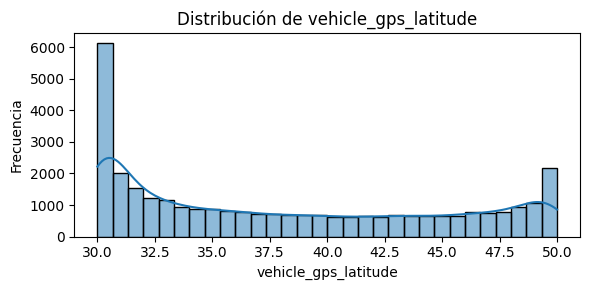

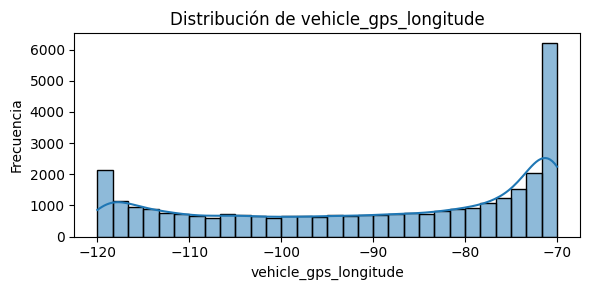

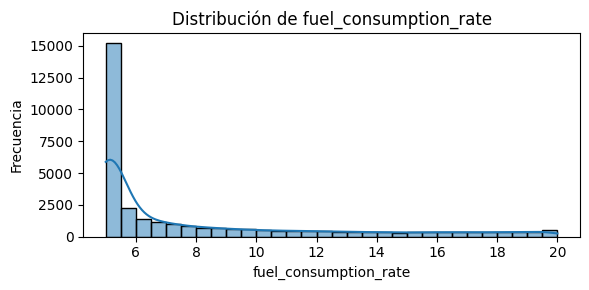

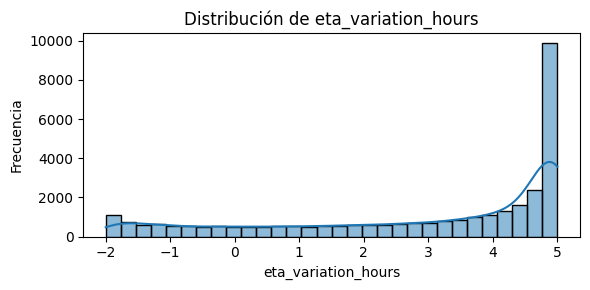

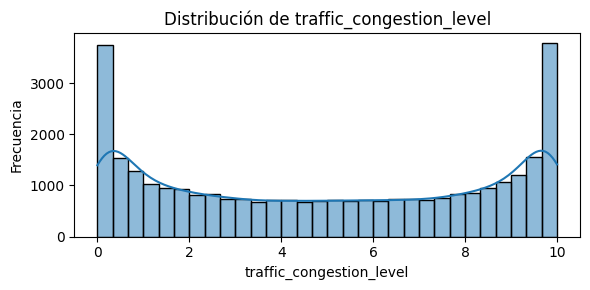

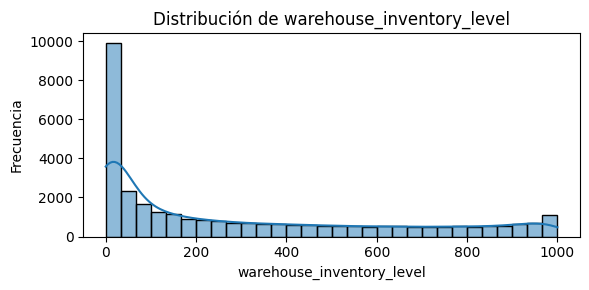

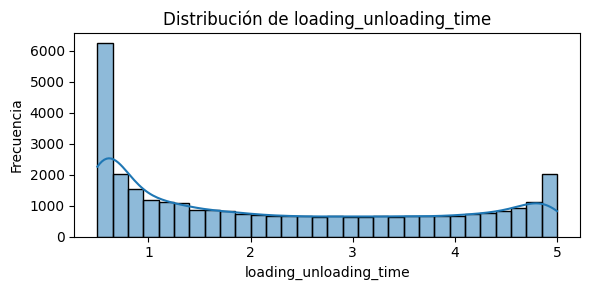

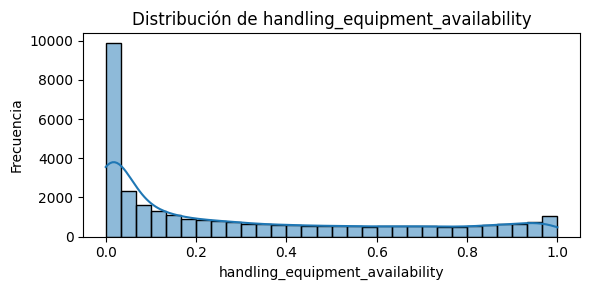

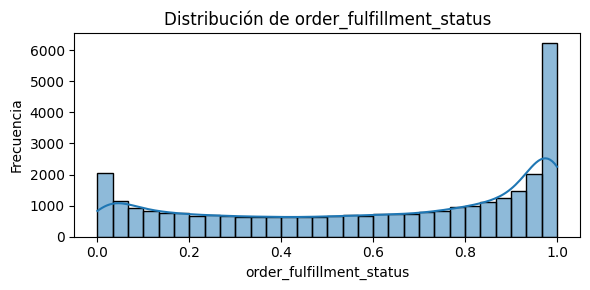

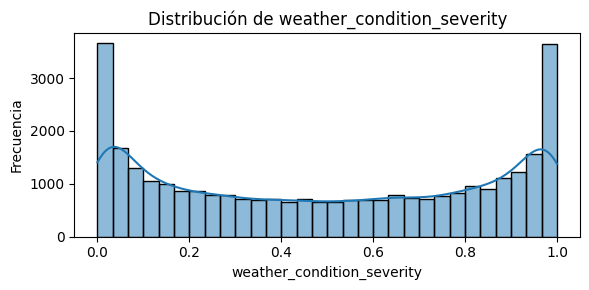

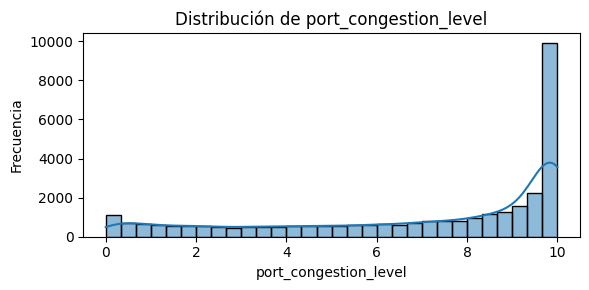

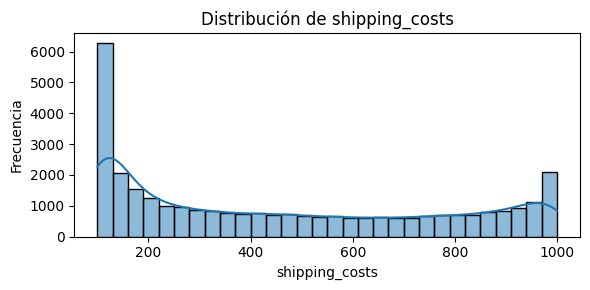

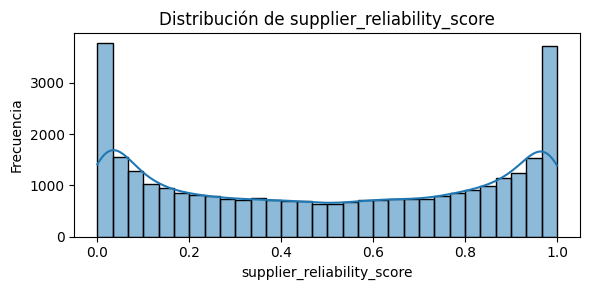

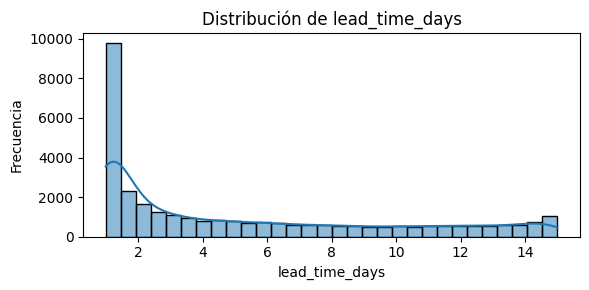

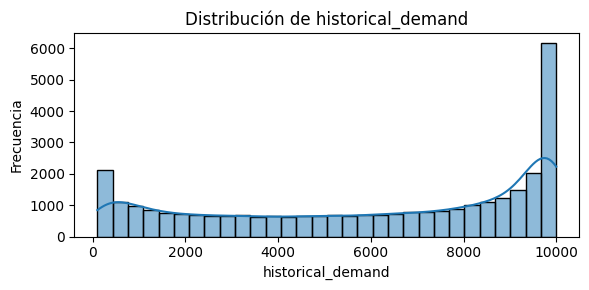

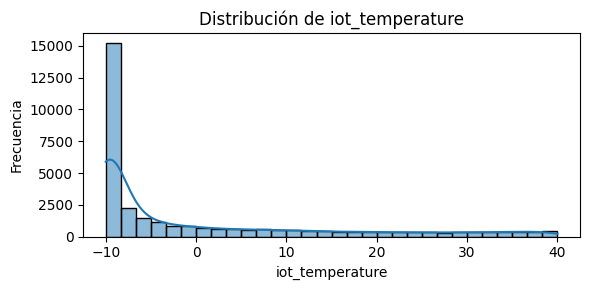

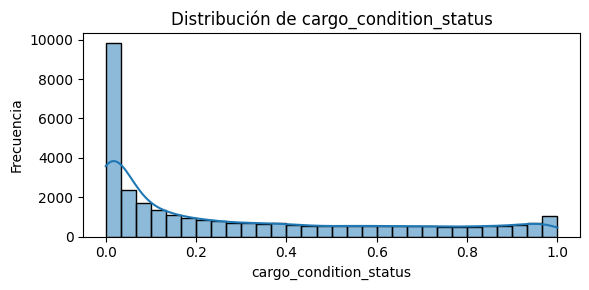

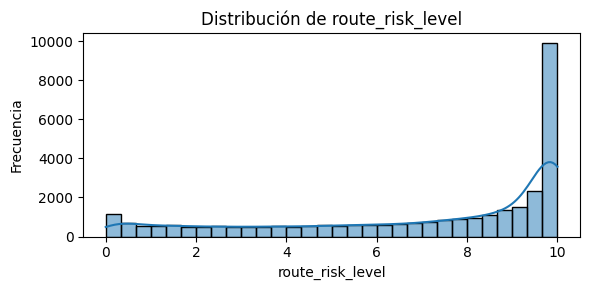

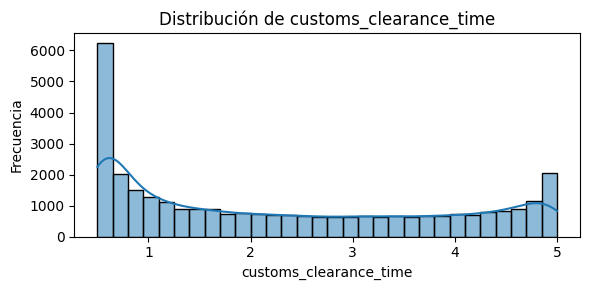

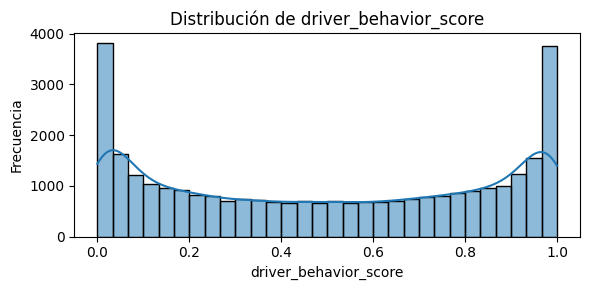

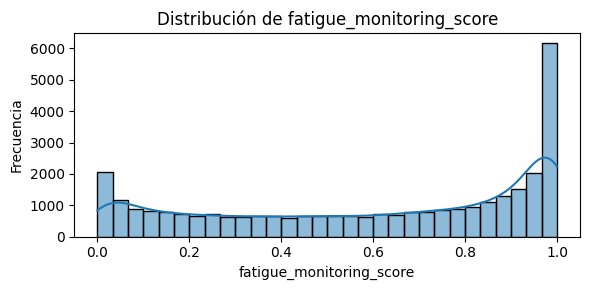

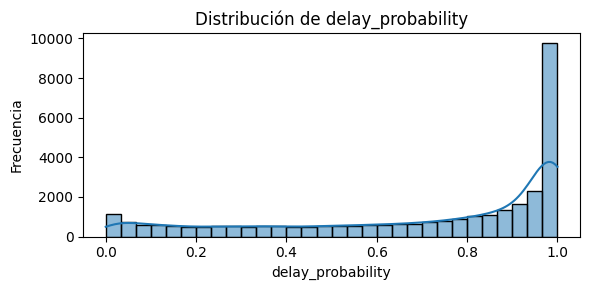

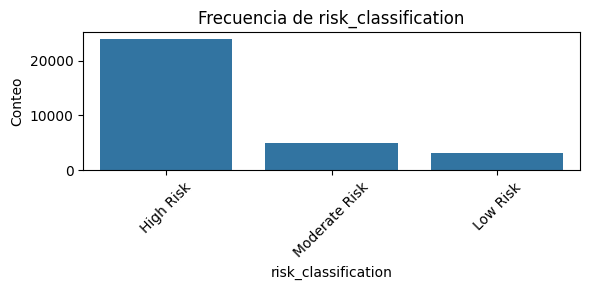

In [35]:
# Análisis para variables numéricas
numeric_cols = df_gps.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_gps[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

# Análisis para variables categóricas
cat_cols = df_gps.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    order = df_gps[col].value_counts().index
    sns.countplot(data=df_gps, x=col, order=order)
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Análisis bivariante


Con el objetivo de explorar la relación entre variables numéricas y la clasificación de riesgo (`risk_classification`), se optó por representar la **densidad conjunta** de distintas combinaciones de variables. Debido al alto volumen de datos disponibles, los gráficos de dispersión tradicionales no ofrecían una visualización clara ni interpretable, ya que los puntos se superponían en exceso.

En su lugar, se emplearon gráficos de tipo `kdeplot` con segmentación por clase de riesgo. La primera visualización muestra la densidad conjunta entre `fuel_consumption_rate` y `driver_behavior_score`, mientras que la segunda representa la interacción entre `iot_temperature` y `fatigue_monitoring_score`. Estas representaciones permiten identificar patrones de concentración de datos y posibles zonas críticas asociadas a diferentes niveles de riesgo operativo, lo que facilita un análisis más preciso del comportamiento logístico observado.


c:\Users\danyo\tfm310\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


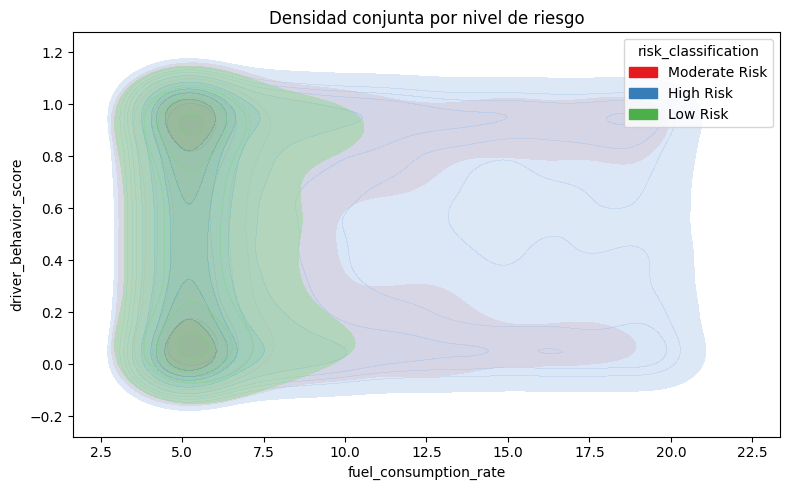

In [36]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_gps,
    x='fuel_consumption_rate',
    y='driver_behavior_score',
    hue='risk_classification',
    fill=True,
    alpha=0.4,
    linewidth=1,
    palette='Set1'
)
plt.title('Densidad conjunta por nivel de riesgo')
plt.tight_layout()
plt.show()

c:\Users\danyo\tfm310\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


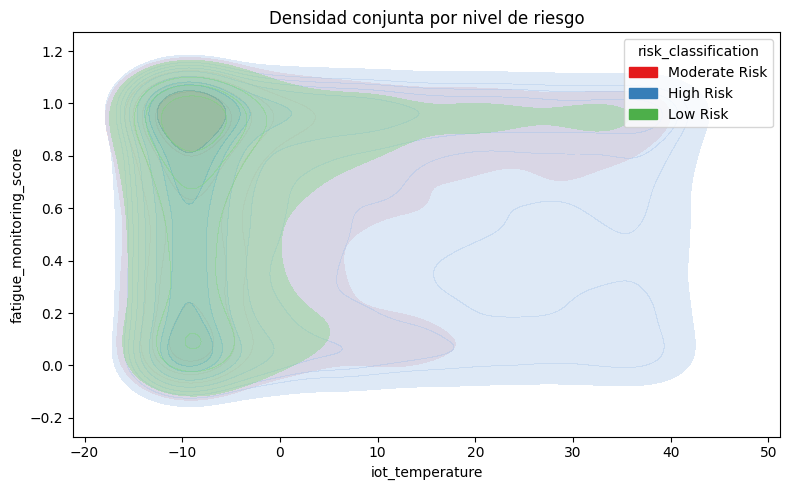

In [37]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_gps,
    x='iot_temperature',
    y='fatigue_monitoring_score',
    hue='risk_classification',
    fill=True,
    alpha=0.4,
    linewidth=1,
    palette='Set1'
)
plt.title('Densidad conjunta por nivel de riesgo')
plt.tight_layout()
plt.show()


# Matriz de correlación

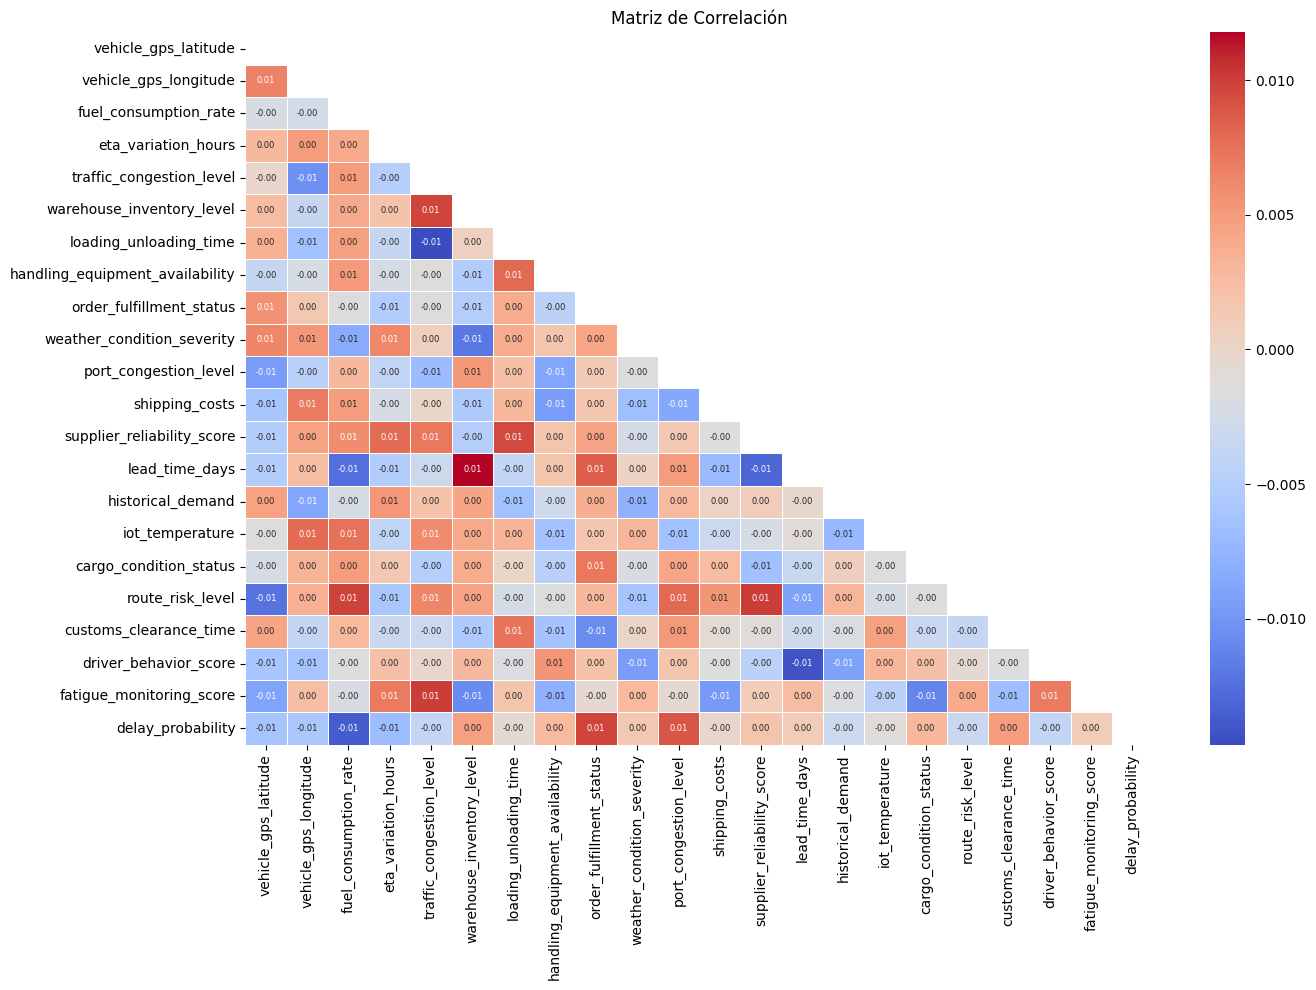

In [38]:
# Matriz de correlación
numeric_cols = df_gps.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_gps[numeric_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=False,
    linewidths=0.5,
    annot_kws={"size": 6}
)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Se generó una matriz de correlación para observar de forma general las relaciones lineales entre las variables numéricas del conjunto `df_gps`. En términos generales, las correlaciones encontradas son bajas o cercanas a cero, lo cual indica una baja colinealidad entre las variables. Esta visualización sirve como referencia inicial para entender la interacción entre atributos antes de aplicar técnicas de reducción de dimensionalidad o selección de características.

# Exploración de outliers

**Exploración de posibles outliers con boxplots**

Se generaron gráficos tipo boxplot para todas las variables numéricas con el fin de visualizar posibles valores atípicos. Esta técnica ayuda a detectar registros que se encuentran fuera del rango esperado en cada variable, lo cual podría ser indicio de errores, condiciones extremas o alguna otra razón relacionada al comportamiento de los dispositivos IoT.


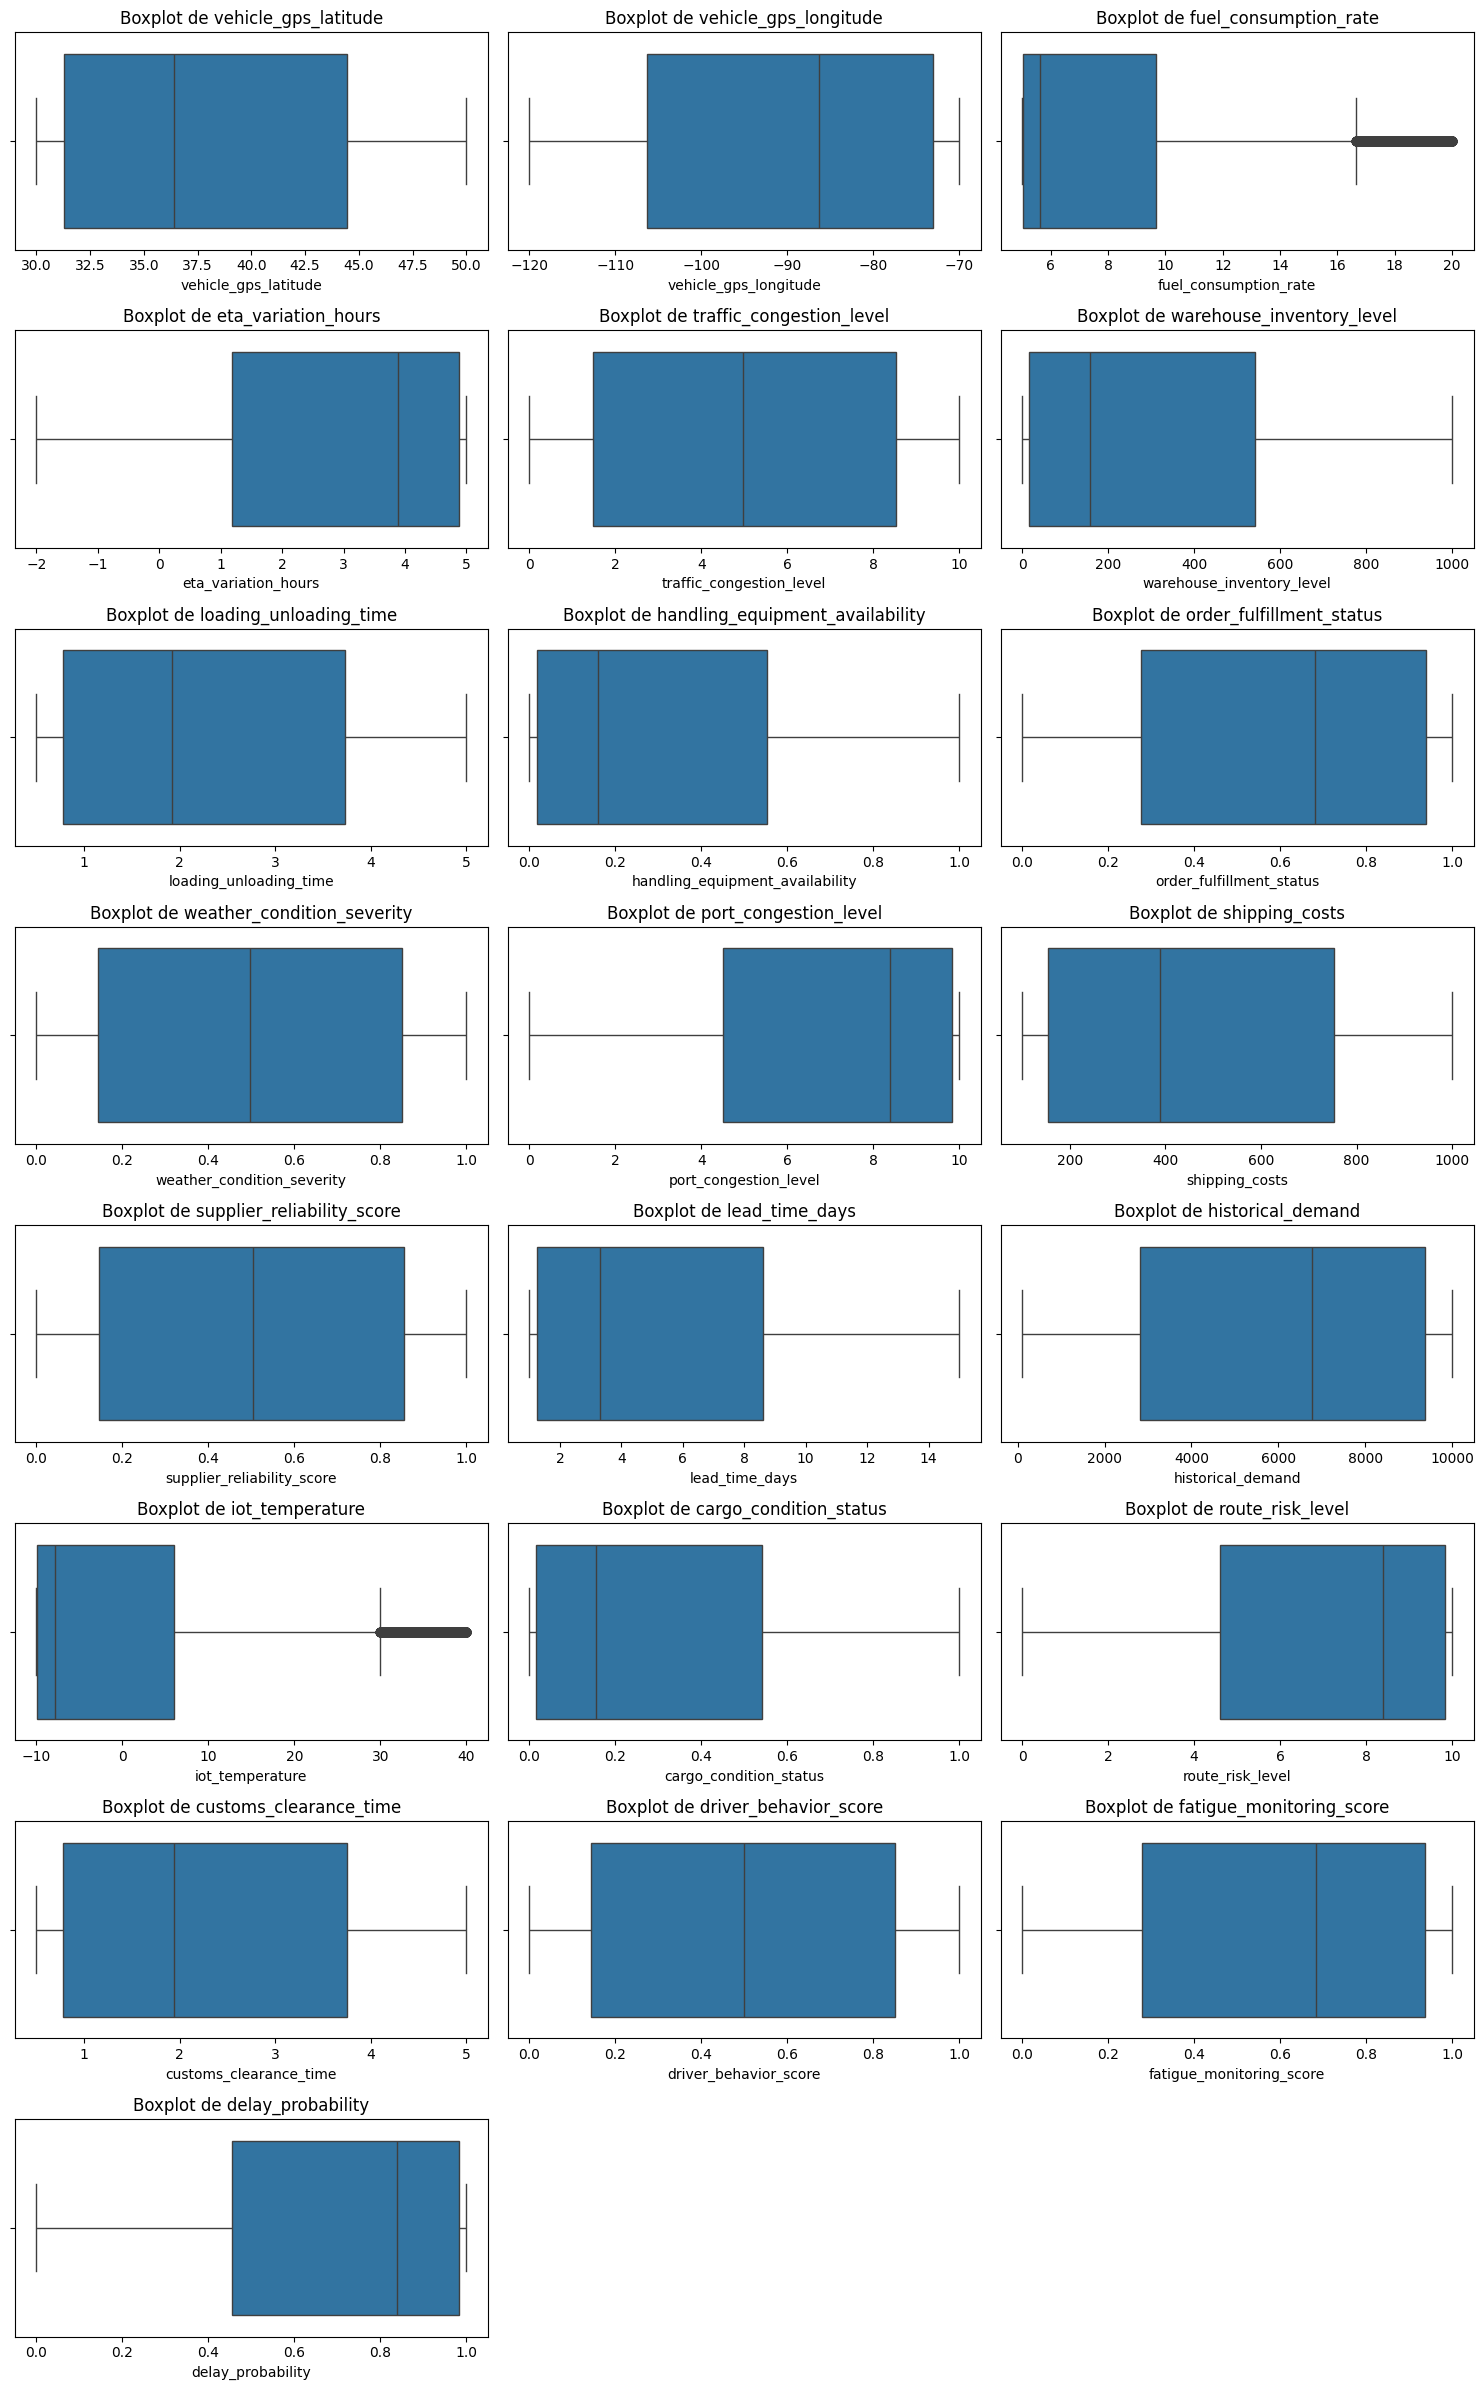

In [39]:
# Seleccionar columnas numéricas
numeric_cols = df_gps.select_dtypes(include=['float64', 'int64']).columns

# Definir dimensiones de plot
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Crear figura con subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Generar los boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_gps, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Análisis de outliers con boxplots**

Al revisar los boxplots de las variables numéricas del dataset, salta a la vista que hay varios valores que podrían considerarse atípicos. Por ejemplo, en columnas como `fuel_consumption_rate` e `iot_temperature` se notan puntos fuera del rango habitual, lo cual podría indicar condiciones poco comunes en la operación.

La variable y `delay_probability` también está normalizadas entre 0 y 1, y aunque se ve bien distribuída, algunos valores cercanos a 1 podrían representar situaciones de riesgo alto. En `eta_variation_hours` hay valores negativos, que probablemente indican adelantos en la entrega, pero conviene validarlo antes de hacer supuestos.

Este paso ayuda a tener más claridad sobre qué variables podrían necesitar limpieza o transformación antes de pasar al modelado.



**Tratamiento de outliers**

Se aplicó un proceso de capping para limitar los valores atípicos en las variables numéricas, utilizando el rango intercuartílico (IQR) como criterio. Este método establece límites inferiores y superiores a partir de los percentiles 25 y 75, reduciendo la influencia de valores extremos sin eliminarlos del conjunto de datos. Los umbrales fueron calculados únicamente sobre los datos de entrenamiento (`X_train_cls`) para evitar cualquier tipo de filtración de información hacia el conjunto de prueba. Posteriormente, se aplicó la misma transformación tanto al entrenamiento como al test para mantener la coherencia en el preprocesamiento.

In [40]:
# Separar variables predictoras (X) y objetivos (y)
X = df_gps.drop(columns=['risk_classification', 'delay_probability'])
y_cls = df_gps['risk_classification']

In [41]:
# Tratamiento de outliers sobre X completo
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    q1 = X[col].quantile(0.25)
    q3 = X[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

# Distribución de la variable objetivo "risk_classification"

In [42]:
# Porcentaje de distribución de la variable objetivo "risk_classification"
(y_cls
   .value_counts(normalize=True)
   .mul(100)
   .round(2)
   .rename('Porcentaje')
   .to_frame())

,Porcentaje
risk_classification,
High Risk,74.67
Moderate Risk,15.63
Low Risk,9.70


Se calculó la distribución porcentual de la variable objetivo `risk_classification` con el fin de evaluar el equilibrio entre clases. Los resultados muestran un claro desbalance, ya que la clase `High Risk` representa el 74.67 % del total de registros, mientras que las clases `Moderate Risk` y `Low Risk` corresponden únicamente al 15.63 % y 9.70 %, respectivamente. Este desbalance será un aspecto importante a considerar en las siguientes etapas del modelado para evitar sesgos en la predicción

# División del dataset en entrenamiento y prueba

Se realiza la separación del conjunto de datos en subconjuntos de entrenamiento y prueba para ambas tareas: clasificación y regresión. En el caso de la clasificación (variable `risk_classification`), se utiliza `stratify` para asegurar que la proporción de clases se mantenga equilibrada en ambos subconjuntos. Esto permite evaluar los modelos con datos que representen adecuadamente la distribución original sin introducir sesgos.

In [43]:
# División para clasificación
X_train_cls, X_test_cls, y_train_cls_raw, y_test_cls_raw = train_test_split(
    X, y_cls, test_size=0.2, stratify=y_cls, random_state=seed
)

# Codificación y balanceo de la variable objetivo Risk Classification

Se procedió a codificar la variable objetivo `risk_classification` utilizando `LabelEncoder`, con el objetivo de convertir sus categorías en valores numéricos que puedan ser interpretados por los algoritmos de clasificación. El codificador fue ajustado únicamente con los datos de entrenamiento (`y_train_cls_raw`) y posteriormente aplicado al conjunto de prueba, manteniendo la integridad del proceso.

Además, se eliminaron las columnas con tipo de dato `datetime` de los conjuntos `X_train_cls` y `X_test_cls`, ya que no serán utilizadas directamente en el modelado y podrían generar incompatibilidades si no son transformadas adecuadamente.


In [44]:
le = LabelEncoder()
y_train_cls = le.fit_transform(y_train_cls_raw)
y_test_cls  = le.transform(y_test_cls_raw)

In [45]:
X_train_cls = X_train_cls.select_dtypes(exclude=['datetime64[ns]'])
X_test_cls  = X_test_cls.select_dtypes(exclude=['datetime64[ns]'])

In [46]:
# Balanceo de clases

smote = SMOTE(random_state=seed)
X_train_cls_res, y_train_cls_res = smote.fit_resample(X_train_cls, y_train_cls)

# Selección de características Risk Classification

In [47]:
# Calcular la matriz de correlación
corr_matrix = df_gps.corr(numeric_only=True)

# Obtener correlaciones absolutas
corr_with_delay = corr_matrix["delay_probability"].abs().sort_values(ascending=False)

# Mostrar las variables más correlacionadas
print("\nVariables más correlacionadas con 'delay_probability':")
print(corr_with_delay.drop("delay_probability").head(10))


Variables más correlacionadas con 'delay_probability':
fuel_consumption_rate       0.013655
year                        0.010572
order_fulfillment_status    0.009730
port_congestion_level       0.008972
hour                        0.007641
eta_variation_hours         0.006897
day                         0.006816
vehicle_gps_latitude        0.006185
month                       0.006006
vehicle_gps_longitude       0.005691
Name: delay_probability, dtype: float64


**Selección de características basada en correlación**

Se evaluó inicialmente la posibilidad de seleccionar variables predictoras a partir de su correlación con la variable objetivo `delay_probability`. Para ello, se calculó la matriz de correlación de Pearson y se identificaron las variables numéricas más asociadas con la variable objetivo.

Sin embargo, los resultados mostraron que incluso las variables más correlacionadas presentaban coeficientes muy bajos (menores al 2%), lo cual indica una relación lineal débil o prácticamente inexistente. Bajo este escenario, utilizar únicamente la correlación como criterio para eliminar variables podría llevar a descartar predictores que, en combinación con otros o a través de relaciones no lineales, sí podrían aportar valor al modelo.

Por esta razón, se descartó esta técnica como método principal de selección de características y se optará por enfoques más robustos basados en modelos, como el análisis de importancia de variables mediante Random Forest o técnicas de reducción de dimensionalidad como PCA.


In [48]:
# Copiar el dataset original
df = df_gps_reg.copy()

# Definir variable objetivo y características
y = df['delay_probability']
X = df.drop(columns=['delay_probability', 'timestamp', 'risk_classification'])

# Eliminar cualquier columna de tipo datetime
X = X.select_dtypes(exclude=['datetime64[ns]'])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=seed)

# Entrenar Random Forest
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)

# Calcular importancia de cada característica
importancias = rf.feature_importances_
features = X_train.columns

# Crear DataFrame con resultados ordenados
importancia_df = pd.DataFrame({
    'feature': features,
    'importance': importancias
}).sort_values(by='importance', ascending=False)

# Mostrar las diez características más relevantes
print("Top 10 características para delay_probability:")
print(importancia_df.head(10))


Top 10 características para delay_probability:
                       feature  importance
4     traffic_congestion_level    0.044789
9   weather_condition_severity    0.044762
14           historical_demand    0.044675
3          eta_variation_hours    0.044132
20    fatigue_monitoring_score    0.043980
5    warehouse_inventory_level    0.043702
10       port_congestion_level    0.043699
13              lead_time_days    0.043618
11              shipping_costs    0.043582
1        vehicle_gps_longitude    0.043508


**Selección de características mediante Random Forest Regressor**

Se entrenó un modelo de `RandomForestRegressor` para estimar la importancia relativa de cada variable con respecto a la probabilidad de retraso (`delay_probability`). Aunque esta técnica es útil para detectar variables con mayor capacidad explicativa, en este caso los valores obtenidos fueron bastante similares entre sí, sin diferencias marcadas en los primeros lugares.

Esto indica que no hay una o dos variables claramente determinantes, sino que el comportamiento de la variable objetivo responde a la interacción de múltiples factores logísticos. Por este motivo, se decidió conservar todas las variables en el modelado, ya que eliminar algunas podría afectar negativamente el desempeño general del modelo.


# **Entrenamiento de modelos**

## Modelos para variable Risk Classification

**Selección de modelos basados en árboles**

Se eligieron modelos basados en árboles como punto de partida debido a su capacidad para manejar relaciones no lineales, su robustez frente a datos con distintas escalas y su buen desempeño en problemas con variables que pueden contener valores atípicos o no normalizados. Además, estos modelos ofrecen interpretabilidad y no requieren una transformación previa compleja de los datos, lo cual los hace adecuados para un primer análisis comparativo.

In [49]:
# Seleccion de modelos basados en árboles

models_tree = {
    "Decision Tree":      DecisionTreeClassifier(random_state=seed),
    "Random Forest":      RandomForestClassifier(n_estimators=200,
                                                 random_state=seed,
                                                 n_jobs=-1),
    "Gradient Boosting":  GradientBoostingClassifier(random_state=seed)
}

for nombre, modelo in models_tree.items():
    modelo.fit(X_train_cls_res, y_train_cls_res)
    preds = modelo.predict(X_test_cls)
    print(f"\n{nombre}")
    print("Accuracy :", round(accuracy_score(y_test_cls, preds), 4))
    print("F1‑score :", round(f1_score(y_test_cls, preds, average="macro"), 4))


Decision Tree
Accuracy : 0.489
F1‑score : 0.3258

Random Forest
Accuracy : 0.6925
F1‑score : 0.316

Gradient Boosting
Accuracy : 0.6242
F1‑score : 0.3346


**Evaluación inicial de modelos basados en árboles**

Se entrenaron tres modelos de clasificación basados en árboles Decision Tree, Random Forest y Gradient Boosting utilizando el conjunto de entrenamiento balanceado mediante SMOTE. La evaluación se realizó directamente sobre el conjunto de prueba sin aplicar validación cruzada, lo cual permite tener una primera aproximación del rendimiento de cada modelo.

Los resultados muestran que Random Forest obtuvo el mejor desempeño en términos de accuracy, aunque el F1-score se mantuvo bajo en general, reflejando el impacto del desbalance original de clases sobre la predicción.

A continuación, se aplicará validación cruzada estratificada sobre los mismos modelos para obtener una estimación más robusta y generalizable del rendimiento, considerando múltiples particiones del conjunto de entrenamiento.


In [50]:
# Modelos basados en árboles
models_tree = {
    "Decision Tree": DecisionTreeClassifier(random_state=seed),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=seed, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=seed)
}

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Evaluación con validación cruzada
for nombre, modelo in models_tree.items():
    f1_scores = cross_val_score(modelo, X_train_cls_res, y_train_cls_res,
                                cv=cv, scoring='f1_macro', n_jobs=-1)
    acc_scores = cross_val_score(modelo, X_train_cls_res, y_train_cls_res,
                                 cv=cv, scoring='accuracy', n_jobs=-1)

    print(f"\n{nombre}")
    print("F1-score:", round(f1_scores.mean(), 4))
    print("Accuracy:", round(acc_scores.mean(), 4))


Decision Tree
F1-score: 0.5908
Accuracy: 0.5909

Random Forest
F1-score: 0.7996
Accuracy: 0.8005

Gradient Boosting
F1-score: 0.577
Accuracy: 0.5892


**Entrenamiento con modelos que requieren escalado**

Se seleccionaron modelos que se benefician de variables escaladas para asegurar un entrenamiento más eficiente y con mejor desempeño. La regresión logística, las máquinas de vectores de soporte (SVM) y las redes neuronales son modelos sensibles a la magnitud de los datos, por lo que se aplicó una normalización previa usando `StandardScaler`. Esto permite que todas las variables contribuyan de manera equitativa al aprendizaje y evita sesgos provocados por diferencias de escala.

In [51]:
# Instanciar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_cls_res)

# Transformar los datos de prueba con los mismos parámetros
X_test_scaled = scaler.transform(X_test_cls)

In [52]:
# Modelos a probar
models_scaled = {
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=seed),
    "SVM": SVC(random_state=seed),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=seed)
}

# Entrenar y evaluar
for nombre, modelo in models_scaled.items():
    modelo.fit(X_train_scaled, y_train_cls_res)
    preds = modelo.predict(X_test_scaled)
    print(f"\n{nombre}")
    print("Accuracy :", round(accuracy_score(y_test_cls, preds), 4))
    print("F1-score :", round(f1_score(y_test_cls, preds, average="macro"), 4))



XGBoost
Accuracy : 0.6351
F1-score : 0.3234

SVM
Accuracy : 0.6392
F1-score : 0.3309

Neural Network
Accuracy : 0.5367
F1-score : 0.3275


**Resultados y siguientes pasos**

Tras evaluar una variedad de modelos supervisados, tanto basados en árboles como aquellos que requieren escalado, se observó que el desempeño general no fue óptimo, con métricas de F1-score y accuracy moderadas. Esto sugiere que las clases pueden no estar claramente separadas con las variables actuales, o que podría haber ruido o poca representatividad en los datos. Como siguiente paso, se plantea ajustar hiperparámetros y considerar métodos de selección o combinación de modelos para mejorar el rendimiento.

In [53]:
from scipy.stats import randint

# Modelo base
rf_base = RandomForestClassifier(n_estimators=200, random_state=seed, n_jobs=-1)

# Definir el espacio de búsqueda aleatoria
param_dist = {
    'n_estimators': randint(150, 250),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Validación cruzada
cv_search = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

# Randomized Search con 20 iteraciones
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv_search,
    scoring='accuracy',
    random_state=seed,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_cls_res, y_train_cls_res)

print("Mejores parámetros del Random Search:")
print(random_search.best_params_)

# Ajustar la búsqueda con GridSearch
n = random_search.best_params_['n_estimators']
param_grid = {
    'n_estimators': [max(n - 20, 100), n, n + 20],
    'max_depth': [random_search.best_params_['max_depth']],
    'min_samples_split': [random_search.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search.best_params_['min_samples_leaf']],
    'max_features': [random_search.best_params_['max_features']]
}

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=cv_search,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_cls_res, y_train_cls_res)

print("Mejores parámetros:")
print(grid_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores parámetros del Random Search:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 158}
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores parámetros:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 178}


Evaluación con validación cruzada:
F1-score: 0.7877
Accuracy: 0.789

Evaluación sobre el conjunto de prueba real:
Accuracy: 0.6914
F1-score: 0.3119


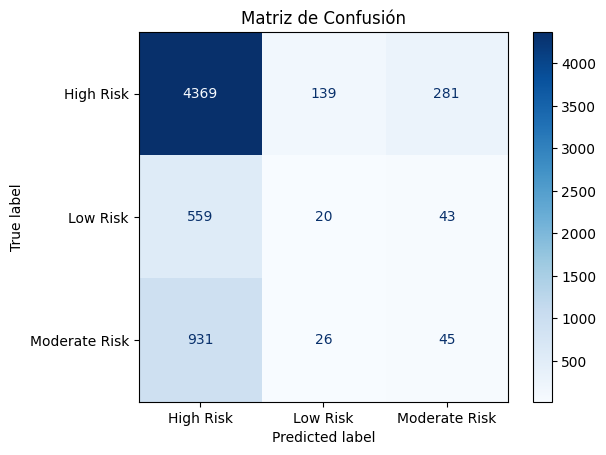

In [54]:
# Definir el modelo final con mejores hiperparámetros
mejor_rf = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=178,
    random_state=seed,
    n_jobs=-1
)

# Validación cruzada externa
cv_final = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Evaluar con cross-validation
f1_scores = cross_val_score(mejor_rf, X_train_cls_res, y_train_cls_res,
                            cv=cv_final, scoring='f1_macro', n_jobs=-1)
acc_scores = cross_val_score(mejor_rf, X_train_cls_res, y_train_cls_res,
                             cv=cv_final, scoring='accuracy', n_jobs=-1)

print("Evaluación con validación cruzada:")
print("F1-score:", round(f1_scores.mean(), 4))
print("Accuracy:", round(acc_scores.mean(), 4))

# Entrenamiento final
mejor_rf.fit(X_train_cls_res, y_train_cls_res)

# Predicciones sobre el conjunto de prueba
preds = mejor_rf.predict(X_test_cls)

# Evaluación sobre test
print("\nEvaluación sobre el conjunto de prueba real:")
print("Accuracy:", round(accuracy_score(y_test_cls, preds), 4))
print("F1-score:", round(f1_score(y_test_cls, preds, average="macro"), 4))

# Matriz de confusión
cm = confusion_matrix(y_test_cls, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

Evaluación final del modelo Random Forest optimizado

Una vez ajustados los hiperparámetros del modelo `Random Forest` mediante técnicas de búsqueda aleatoria, se procedió a validar su rendimiento mediante validación cruzada estratificada. En los resultados obtenidos podemos ver un rendimiento sólido en el conjunto de entrenamiento balanceado:
 
- Accuracy promedio (CV): 0.789

Posteriormente, el modelo se entrenó con todos los datos de entrenamiento balanceados y se evaluó sobre el conjunto de prueba real. En este caso, el rendimiento disminuyó significativamente:

- Accuracy en test: 0.6914 

**Ensemble de modelos**

Se va a realizar la prueba con un ensemble de modelos a ver si se puede robustecer las proyecciones. Los modelos elegidos para el ensemble de modelos son RandomForest, GradientBoosting y SVC.

In [55]:
# Definir el mejor modelo RF
mejor_rf = RandomForestClassifier(
    n_estimators=178,
    max_depth=None,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=seed,
    n_jobs=-1
)

# Otros modelos
modelo_gb = GradientBoostingClassifier(random_state=seed)
modelo_svm = SVC(probability=True, random_state=seed)

# Crear ensemble de modelos
ensemble = VotingClassifier(
    estimators=[
        ('rf', mejor_rf),
        ('gb', modelo_gb),
        ('svm', modelo_svm)
    ],
    voting='soft',
    n_jobs=-1
)

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Evaluar F1-score macro y accuracy
f1_scores = cross_val_score(ensemble, X_train_scaled, y_train_cls_res, 
                            cv=cv, scoring='f1_macro', n_jobs=-1)
acc_scores = cross_val_score(ensemble, X_train_scaled, y_train_cls_res, 
                             cv=cv, scoring='accuracy', n_jobs=-1)

print("Evaluación con validación cruzada del ensemble:")
print("F1-score :", round(f1_scores.mean(), 4))
print("Accuracy :", round(acc_scores.mean(), 4))

# Entrenar con todo el dataset balanceado
ensemble.fit(X_train_scaled, y_train_cls_res)

# Evaluar sobre conjunto de prueba real
preds = ensemble.predict(X_test_scaled)
print("\nEvaluación en conjunto de prueba:")
print("Accuracy :", round(accuracy_score(y_test_cls, preds), 4))
print("F1-score :", round(f1_score(y_test_cls, preds, average='macro'), 4))


Evaluación con validación cruzada del ensemble:
F1-score : 0.7811
Accuracy : 0.7824

Evaluación en conjunto de prueba:
Accuracy : 0.6658
F1-score : 0.3159


### Comparación final entre el ensemble y el modelo Random Forest

Después de ajustar los hiperparámetros del modelo Random Forest y obtener buenos resultados, se probó crear un ensemble combinando ese modelo con Gradient Boosting y SVM.
Al evaluar este ensemble con validación cruzada, se obtuvieron resultados estables y bastante buenos:

- **F1-score:** 0.7811  
- **Accuracy:** 0.7824

Sin embargo, al probarlo con el conjunto de prueba real, el desempeño bajó notablemente:

- **Accuracy en test:** 0.6658  
- **F1-score en test:** 0.3159

En comparación, el modelo Random Forest individual, usando los mismos datos y validación cruzada, había logrado una precisión del 80%. Esto muestra que, al menos en este caso, el ensemble no mejora el rendimiento y que el Random Forest por sí solo funciona mejor, tanto en validación como en datos nuevos. A pesar de que combinar modelos a veces ayuda, acá no aportó ventaja frente al modelo ya optimizado.

### Resumen del proceso de modelado para la predicción de riesgo

Tras una exploración inicial del dataset, se realizó un análisis detallado de las variables disponibles, tanto univariantes como bivariantes, así como el tratamiento de valores atípicos y nulos. Posteriormente, se dividieron los datos en conjuntos de entrenamiento y prueba, asegurando que la variable objetivo categórica (`risk_classification`) se mantuviera estratificada, dada su distribución desbalanceada.

Debido a este desbalance, se aplicó la técnica de sobremuestreo SMOTE para equilibrar las clases en el conjunto de entrenamiento. A partir de allí, se procedió a entrenar diferentes modelos de clasificación, agrupándolos en dos categorías: modelos basados en árboles (como Decision Tree, Random Forest y Gradient Boosting) y modelos que requieren datos escalados (Logistic Regression, SVM y redes neuronales).

De todos los modelos evaluados, **Random Forest fue el que obtuvo el mejor desempeño**, alcanzando un **accuracy de 0.69** y un **F1-score razonable en comparación con las demás alternativas**. Esta elección se justificó no solo por su rendimiento, sino también por su robustez frente a datos con baja correlación entre características y su capacidad para manejar conjuntos con muchas variables sin necesidad de reducción dimensional.

Se probaron enfoques adicionales como el uso de XGBoost, redes neuronales profundas y reducción de dimensionalidad con PCA. Sin embargo, ninguno logró superar el rendimiento alcanzado con Random Forest. Incluso tras aplicar técnicas como la búsqueda de hiperparámetros y ensamblado de modelos, el desempeño no mostró una mejora significativa.

Se optó por utilizar Random Forest como modelo final, ya que ofreció una mejor interpretación de las interacciones entre variables, sin depender de procesos de transformación complejos.

# Modelos para variable Delay Probability

## Ingeniería de características temporales

En esta celda se transforma la columna `timestamp` al tipo `datetime` para poder descomponerla en componentes significativos:  
- Año, mes y día, que capturan variaciones estacionales y de calendario.  
- Día de la semana (0 = lunes … 6 = domingo) y hora, que reflejan ciclos semanales y horarios.  
- Indicador de fin de semana, que marca si la observación corresponde a sábado o domingo.  

Dado que la variable objetivo `delay_probability` está directamente relacionada con factores temporales, consideramos fundamental incluir estas nuevas variables de tiempo. Esto permite al modelo detectar patrones de retrasos asociados a fechas y horas específicas.  

Al finalizar, se elimina la columna `timestamp` original para evitar duplicar información y dejar únicamente las nuevas variables numéricas que incorporan la dimensión temporal al modelo.

In [56]:
# Convertir la columna timestamp al tipo datetime
df_gps_reg['timestamp'] = pd.to_datetime(df_gps_reg['timestamp'], errors='coerce')
df_gps_reg = df_gps_reg.sort_values('timestamp').reset_index(drop=True)

# Extraer componentes temporales a partir de la fecha
df_gps_reg['year']        = df_gps_reg['timestamp'].dt.year
df_gps_reg['month']       = df_gps_reg['timestamp'].dt.month
df_gps_reg['day']         = df_gps_reg['timestamp'].dt.day
df_gps_reg['day_of_week'] = df_gps_reg['timestamp'].dt.dayofweek
df_gps_reg['hour']        = df_gps_reg['timestamp'].dt.hour
df_gps_reg['is_weekend']  = df_gps_reg['day_of_week'].isin([5, 6]).astype(int)

# Eliminar la columna original para evitar redundancia
df_gps_reg = df_gps_reg.drop(columns=['timestamp'])

### Generación de características de dependencia temporal

En este bloque se crean variables que permiten al modelo tener en cuenta cómo ha evolucionado la probabilidad de retraso en periodos recientes:

1. Variables de rezago  
   Para cada retraso de 1, 2, 3, 6, 12 y 24 horas se genera una nueva columna `lag_n`. Estas variables reflejan directamente el valor de `delay_probability` en instantes anteriores y ayudan a captar la inercia de los retrasos.

2. Estadísticos móviles 
   - `roll3_mean`: promedio de las últimas 3 horas  
   - `roll6_std`: desviación estándar de las últimas 6 horas  
   Estas ventanas permiten resumir la tendencia y la variabilidad de los retrasos en el corto plazo.

3. Limpieza de datos
   Las primeras filas quedan con valores nulos al calcular rezagos y ventanas móviles, por lo que se eliminan con `dropna()` para garantizar que el conjunto final no contenga registros incompletos.

Con estas nuevas características el modelo dispone de información explícita sobre el comportamiento reciente de la variable objetivo, lo cual suele mejorar la capacidad predictiva cuando existen patrones temporales claros.

In [57]:
# Generar variables de rezago para capturar la dependencia temporal
for lag in [1, 2, 3, 6, 12, 24]:
    df_gps_reg[f'lag_{lag}'] = df_gps_reg['delay_probability'].shift(lag)

# Calcular estadísticos móviles sobre ventanas de 3 y 6 horas
df_gps_reg['roll3_mean'] = df_gps_reg['delay_probability'].rolling(window=3).mean()
df_gps_reg['roll6_std']  = df_gps_reg['delay_probability'].rolling(window=6).std()

# Eliminar filas con valores nulos generados por los rezagos y las ventanas móviles
df_gps_reg = df_gps_reg.dropna()

### Preparación de datos y configuración del preprocesamiento

En esta sección se realiza la separación entre la variable objetivo y las características, y se define el esquema de transformación de las columnas:

1. Definición de X e y
   - `y` contiene `delay_probability`, que es la variable que se desea predecir.  
   - `X` incluye todas las demás columnas generadas hasta este punto, tanto numéricas como categóricas.

2. Identificación de tipos de columnas 
   - `num_cols`: lista de las columnas de tipo numérico.  
   - `cat_cols`: lista de las columnas de tipo objeto (categorías).

3. Transformaciones
   - A las columnas numéricas se les aplica `StandardScaler` para escalar los valores y centrar la media en cero.  
   - A las columnas categóricas se les aplica codificación (`OneHotEncoder`) para convertir cada categoría en una columna binaria.

In [58]:
# Preparar datos
y = df_gps_reg['delay_probability']
X = df_gps_reg.drop(columns=['delay_probability'])


# Selección de columnas numéricas y categóricas
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()


# Preprocesador 
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

## Búsqueda de hiperparámetros con validación cruzada

En este bloque se configura y ejecuta una búsqueda exhaustiva de los mejores valores para el modelo de `RandomForestRegressor`:

1. Para definir el estimador base se utiliza un `RandomForestRegressor` con semilla fija para garantizar la reproducibilidad.

2. Espacio de búsqueda 
   - `n_estimators`: número de árboles en el bosque, en este caso probamos con los valores 100 y 200.  
   - `max_depth`: profundidad máxima de cada árbol (6, 10, sin límite).  
   - `min_samples_leaf`: número mínimo de muestras en cada hoja (1, 4, 10).  

3. Construcción del pipeline 
   El estimador se integra en un `Pipeline` junto con el escalado a las variables numéricas y codificación one-hot a las categóricas.

4. Para el GridSearchCV se emplea validación cruzada con 3 particiones (cv=3).  

5. Tras ajustar el grid search sobre todo el conjunto `X, y`, se imprimen los mejores hiperparámetros y se extrae el pipeline optimizado para su evaluación posterior.

Este proceso garantiza que el modelo final utilice la combinación óptima de parámetros para predecir `delay_probability`.

In [59]:
# Búsqueda de hiperparámetros

rf = RandomForestRegressor(random_state=seed)

param_grid = {
    "model__n_estimators":     [100, 200],
    "model__max_depth":        [6, 10, None],
    "model__min_samples_leaf": [1, 4, 10],
}

pipeline = Pipeline([
    ("pre",   preprocessor),
    ("model", rf)
])

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)
print("Mejores hiperparámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Mejores hiperparámetros: {'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__n_estimators': 200}


## División del dataset

En esta celda se realiza la partición de los datos en conjuntos de entrenamiento y prueba, reservando el 20 % de las observaciones para evaluación final y empleando una semilla fija para garantizar la reproducibilidad de los resultados. Después de la división, se imprime la forma de ambos subconjuntos para verificar que la proporción de muestras se haya aplicado correctamente y asegurarnos de que tanto el modelo como las métricas de desempeño trabajen sobre conjuntos bien definidos y comparables.

In [60]:
# División Train / Test
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.20,
    random_state=seed,
)

print(f"Train shape: {X_tr.shape}  |  Test shape: {X_te.shape}")

Train shape: (10118, 38)  |  Test shape: (2530, 38)


## Entrenamiento del modelo

En esta fase se evalúa la robustez del modelo mediante validación cruzada de 5 bloques sobre el conjunto de entrenamiento, midiendo el RMSE en cada partición y reportando su media y desviación estándar. A continuación, el `best_model` se ajusta nuevamente sobre todo el conjunto de entrenamiento y se realiza la predicción sobre el conjunto de prueba. Finalmente, se calculan MAE, RMSE y R² para medir el desempeño real del modelo en datos no vistos, garantizando así una estimación fiable de su capacidad predictiva.

In [61]:
# Validación cruzada en el set de entrenamiento
cv_rmse = -cross_val_score(
    best_model,
    X_tr, y_tr,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

print(f"CV RMSE: {cv_rmse.mean():.4f}")

# Entrenamiento y evaluación final
best_model.fit(X_tr, y_tr)
y_pred = best_model.predict(X_te)

mae  = mean_absolute_error(y_te, y_pred)
rmse = np.sqrt(mean_squared_error(y_te, y_pred))
r2   = r2_score(y_te, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")

CV RMSE: 0.0397
Test MAE: 0.0255
Test RMSE: 0.0366
Test R²: 0.9872


## Interpretación de los resultados de evaluación

El **RMSE de validación cruzada** es 0.0397, lo que indica que al probar el modelo en diferentes particiones del conjunto de entrenamiento, el error promedio se mantiene muy bajo. En el **conjunto de prueba**, el **MAE de 0.0255** significa que, en promedio, la predicción de la probabilidad de retraso se desvía solo en 2.55 puntos porcentuales del valor real. El **RMSE de 0.0366** refuerza esta idea, pues muestra que incluso los errores más grandes son moderados. Por último, un **R² de 0.9872** confirma que el modelo explica casi el 99 % de la variabilidad de `delay_probability`.

Que el RMSE de validación y el de prueba sean muy parecidos demuestra que el modelo no se está sobreajustando y puede generalizar a datos nuevos. En conjunto, estas métricas muestran que, al incluir variables de tiempo y rezagos, el modelo aprende de forma efectiva los patrones de retraso y ofrece predicciones precisas y confiables.

# Conclusión general del proyecto

A lo largo de este trabajo se llevó a cabo un análisis profundo sobre distintos aspectos que influyen en el rendimiento y operación de una flota logística, con el objetivo principal de anticipar posibles riesgos y retrasos, apoyando la toma de decisiones en mantenimiento preventivo y planificación de entregas. Para ello, se utilizaron dos conjuntos de datos diferentes: uno enfocado en variables técnicas y operativas de los vehículos, y otro relacionado con registros logísticos en tiempo real, como tiempos de entrega, condiciones climáticas y comportamiento del conductor.

Primero se realizó una limpieza de los datos, organizando la información disponible para poder trabajar con ella de forma confiable. Posteriormente, se exploraron las variables disponibles para entender su comportamiento y detectar patrones importantes, como la presencia de valores extremos o distribuciones desbalanceadas.

Una vez que los datos estuvieron listos, se entrenaron distintos modelos de predicción para abordar dos retos principales: identificar el nivel de riesgo asociado a cada entrega (como alto, medio o bajo), y predecir la probabilidad de que ocurra un retraso en el envío. Para lograrlo, se probaron múltiples algoritmos de machine learning y se evaluó su desempeño con métricas que nos permiten medir qué tan cercanos estaban los resultados generados por los modelos respecto a la realidad.

Además, se incorporaron técnicas para ajustar y mejorar el rendimiento de estos modelos, buscando siempre el mejor balance entre precisión y generalización. En el caso particular de la probabilidad de retraso, se intentaron enfoques tradicionales, así como el análisis de la variable como serie temporal, considerando su comportamiento a lo largo del tiempo.

Todo este proceso permitió descubrir qué factores influyen más en el riesgo de una entrega y en la posibilidad de que se retrase. Por ejemplo, se identificaron variables como las condiciones del tráfico, los niveles de inventario, el cumplimiento de pedidos o incluso indicadores de fatiga del conductor como señales relevantes para anticipar posibles complicaciones.

En conjunto, este análisis ofrece una base sólida para implementar sistemas de mantenimiento más inteligentes y proactivos, capaces de detectar posibles fallos o interrupciones antes de que ocurran. Esto no solo permite mejorar la eficiencia operativa, sino también reducir costos, evitar incidentes logísticos y garantizar un servicio más confiable para los clientes.

# Conclusión general del proyecto

A lo largo de este trabajo se llevó a cabo un análisis profundo sobre distintos aspectos que influyen en el rendimiento y operación de una flota logística, con el objetivo principal de **anticipar posibles riesgos y retrasos**, apoyando la toma de decisiones en mantenimiento preventivo y planificación de entregas.

Para ello, se utilizaron dos conjuntos de datos diferentes:

- Uno enfocado en variables técnicas y operativas de los vehículos.
- Otro relacionado con registros logísticos en tiempo real, como tiempos de entrega, condiciones climáticas y comportamiento del conductor.

**Preparación y análisis de datos**

Primero se realizó una limpieza de los datos, organizando la información para poder trabajar con ella de forma confiable. Luego, se exploraron las variables disponibles para entender su comportamiento y detectar patrones importantes, como la presencia de valores extremos o distribuciones desbalanceadas.

**Modelado predictivo**

Con los datos listos, se entrenaron distintos modelos para abordar dos retos:

- **Clasificar el nivel de riesgo** de cada entrega (alto, medio o bajo).
- **Predecir la probabilidad de retraso** en un envío.

Se probaron múltiples algoritmos de machine learning y se evaluó su desempeño con métricas que indicaban qué tan cercanos estaban los resultados a la realidad. También se ajustaron los modelos para mejorar su rendimiento, buscando siempre el mejor balance entre precisión y generalización.

En el caso de la probabilidad de retraso, se intentaron enfoques clásicos y también un análisis como serie temporal, considerando su evolución a lo largo del tiempo.

**Hallazgos relevantes**

Durante el análisis se identificaron factores clave que influyen en los riesgos y retrasos, como:

- Condiciones del tráfico.
- Niveles de inventario.
- Nivel de cumplimiento de pedidos.
- Indicadores de fatiga del conductor.

Estas variables se destacaron como señales importantes que permiten anticipar complicaciones.

**Resumen**

Este análisis ofrece una base sólida para implementar sistemas de mantenimiento más inteligentes y proactivos, capaces de detectar posibles fallos o interrupciones antes de que ocurran.

Esto permite:

- Mejorar la eficiencia operativa.
- Reducir costos.
- Evitar incidentes logísticos.
- Garantizar un servicio más confiable para los clientes.